# NetworkX library: Basic features overview with examples.
## Created by Vladislav Vitalyevich Panin for the presentation on the topic "Network Data Processing And Manipulation Using Python" for Open University of Israel's Data Science Workshop.

## Check if we're running in Anaconda

In [1]:
import sys 
print(sys.version)

3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]


## Import dependencies and check their versions

In [2]:
import networkx as nx
import pandas as pd
import matplotlib as mpl
import sklearn as skl
import vladislav_utils_v2 as vputil2

import itertools as it
import copy

In [3]:
print("NetworkX version:", nx.__version__)
print("Pandas version:", pd.__version__)
print("MatPlotLib version:", mpl.__version__)
print("Scikit-Learn version:", skl.__version__)

NetworkX version: 3.4.2
Pandas version: 2.2.3
MatPlotLib version: 3.10.0
Scikit-Learn version: 1.6.1


## Define constant variables (datasets path, etc.)

In [4]:
datapath = r"data/"

## Defining NetworkX network graphs

### Undirected graph (in the shape of a star around a single node)

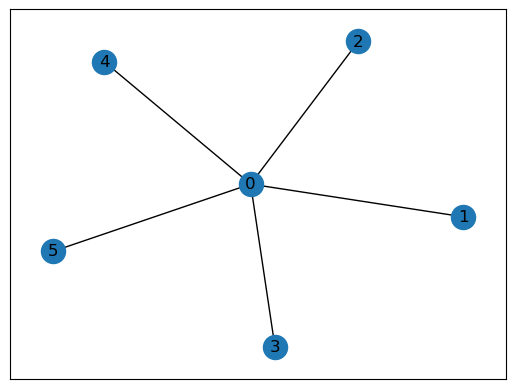

In [5]:
ug = nx.Graph()
ug.add_edge('0','1')
ug.add_edge('0','2')
ug.add_edge('0','3')
ug.add_edge('0','4')
ug.add_edge('0','5')
nx.draw_networkx(ug)

### Directed graph that forms a circle

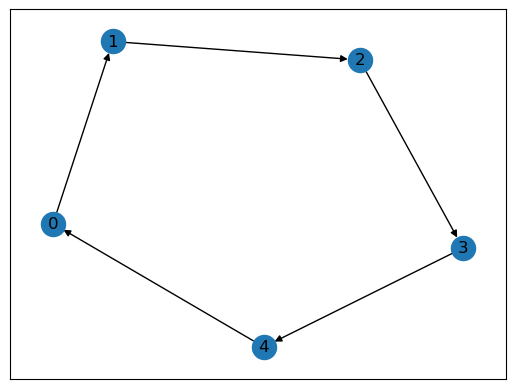

In [6]:
dg = nx.DiGraph()
dg.add_edge('0','1')
dg.add_edge('1','2')
dg.add_edge('2','3')
dg.add_edge('3','4')
dg.add_edge('4','0')
nx.draw_networkx(dg)

## You can define special properties for edges, below are some examples - all made on directed graphs

### Network where each edge has a sign using "sign" attribute

The sign of the directed edge from node 2 to 3 is: +


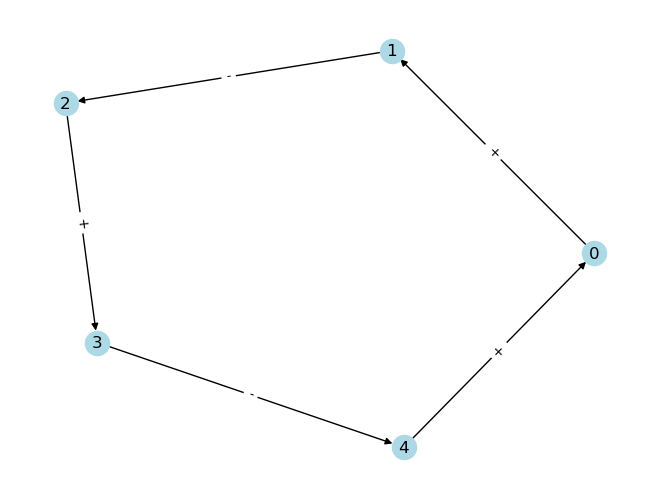

In [7]:
dg_signed = nx.DiGraph()
dg_signed.add_edge('0','1', sign='+')
dg_signed.add_edge('1','2', sign='-')
dg_signed.add_edge('2','3', sign='+')
dg_signed.add_edge('3','4', sign='-')
dg_signed.add_edge('4','0', sign='+')

vputil2.draw_dg_networkx_with_edge_labels(dg_signed, "sign")

print("The sign of the directed edge from node 2 to 3 is:", dg_signed.get_edge_data('2','3')["sign"])

### Network where each edge has a different "relation". This is useful for example to describe social networks, where an example of relation could be "father", "son", "neighbour", etc. between two individuals.

Note: This is NOT a "parallel edge" case, because the directions are reversed, therefore this works.

The relation of the directed edge from node 2 to 3 is: green
The relation of the directed edge from node 3 to 2 is: cyan


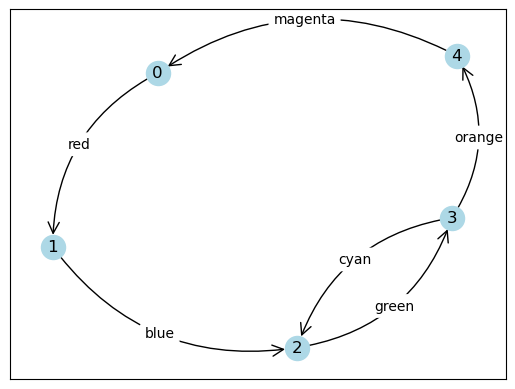

In [8]:
dg_relations = nx.DiGraph()
dg_relations.add_edge('0','1', relation="red")
dg_relations.add_edge('1','2', relation="blue")
dg_relations.add_edge('2','3', relation="green")
dg_relations.add_edge('3','4', relation="orange")
dg_relations.add_edge('4','0', relation="magenta")

dg_relations.add_edge('3','2', relation="cyan")

# Relation 3 -> 2 is "cyan", but 2 -> 3 is "magenta"!

vputil2.draw_dg_networkx_with_edge_labels(dg_relations, "relation", multiple_edges_between_two_nodes=True, curvature_in_rads=0.3)

print("The relation of the directed edge from node 2 to 3 is:", dg_relations.get_edge_data('2','3')["relation"])
print("The relation of the directed edge from node 3 to 2 is:", dg_relations.get_edge_data('3','2')["relation"])

### You can also specify weight for edges

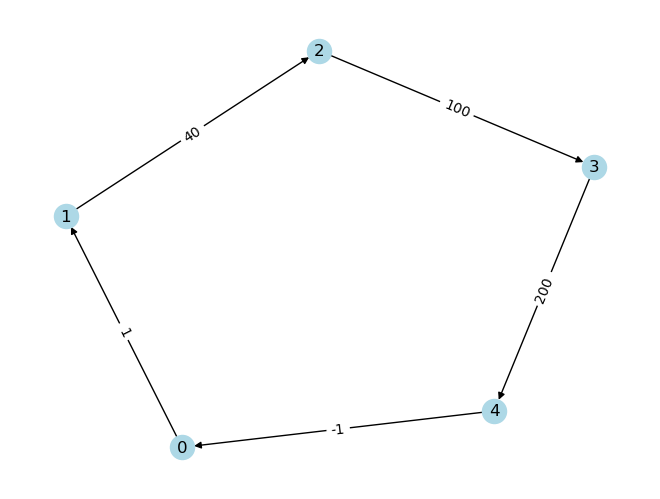

In [9]:
dg_weighted = nx.DiGraph()
dg_weighted.add_edge('0','1', weight=1)
dg_weighted.add_edge('1','2', weight=40)
dg_weighted.add_edge('2','3', weight=100)
dg_weighted.add_edge('3','4', weight=200)
dg_weighted.add_edge('4','0', weight=-1)

vputil2.draw_dg_networkx_with_edge_labels(dg_weighted, "weight")


### Multigraph variants of an undirected and directed graphs exist.
### In a multigraph you can have multiple edges from node A to node B.

### Directed multigraph example - identifying public transportation routes from one place to another

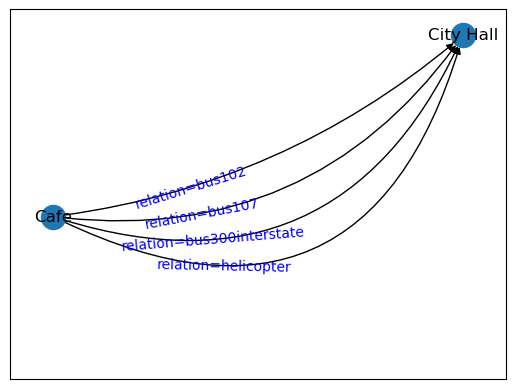

In [10]:
dg_multigraph = nx.MultiDiGraph()

dg_multigraph.add_edge('Cafe','City Hall', weight=15, relation="bus102")
dg_multigraph.add_edge('Cafe','City Hall', weight=60, relation="bus107")
dg_multigraph.add_edge('Cafe','City Hall', weight=36000, relation="bus300interstate")
dg_multigraph.add_edge('Cafe','City Hall', weight=10, relation="helicopter")



vputil2.draw_labeled_multigraph(dg_multigraph, "relation", ax=None)

### We can define nodes for the network graph from lists. For example, let's define a bipartite graph:

## Defining NetworkX network graphs: Importing data

### We can generate the network graph from an adjacency list. Let us use the adjacency list adjacency.txt to import the graph from it below:

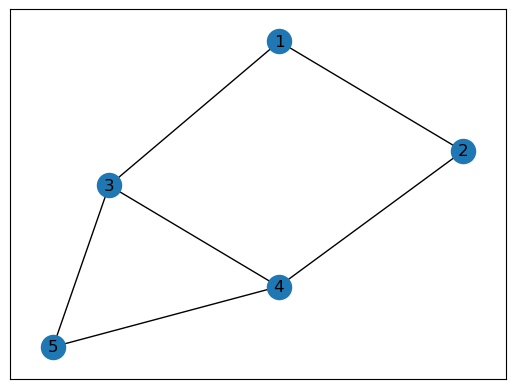

In [11]:
ug_from_adjacency_list = nx.read_adjlist(datapath+'adjacency.txt', nodetype=int)
nx.draw_networkx(ug_from_adjacency_list)

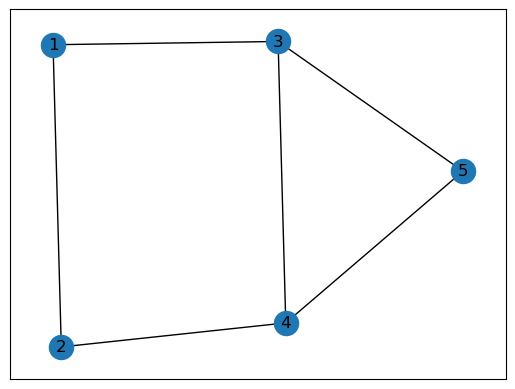

In [12]:
ug_from_adjacency_list = nx.read_adjlist(datapath+'adjacency_pruned.txt', nodetype=int)
nx.draw_networkx(ug_from_adjacency_list)

### Or we can generate a graph from numpy matrix, where k for cell (i,j) means that there's an edge between node i and node j (k>1 means it'll be used as weight):

### We can get the graph from an edge list file, let's do it from the file edgelist.txt:

{('1', '2'): Text(-0.7326151690364062, 0.027975282914841304, 'red'),
 ('1', '3'): Text(-0.26598654680930234, -0.4091309068179265, 'green'),
 ('2', '4'): Text(-0.2340117413981161, 0.42822990613876066, 'blue'),
 ('3', '4'): Text(0.2326149154708761, -0.008883483690539928, 'crimson'),
 ('3', '5'): Text(0.6086337352626987, -0.22438008888365651, 'yellow'),
 ('4', '5'): Text(0.6239821200499585, 0.17729917898500247, 'black')}

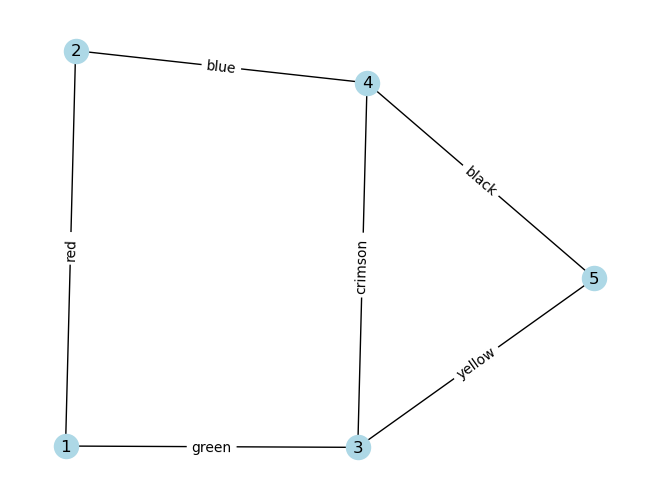

In [13]:
ug_from_edge_list = nx.read_edgelist(datapath+"edge_list.txt")

# Define layout
pos = nx.spring_layout(ug_from_edge_list)

# Draw nodes and edges
nx.draw(ug_from_edge_list, pos, with_labels=True, node_color='lightblue', edge_color='black', arrows=True)
labels = nx.get_edge_attributes(ug_from_edge_list,'relation')
# Draw labels
nx.draw_networkx_edge_labels(ug_from_edge_list,pos,edge_labels=labels)

### Or a CSV, using Pandas data frame

#### Read the Data Frame

In [14]:
ug_from_csv_dataframe = pd.read_csv(datapath+"edge_list.csv", delimiter=',', names=["node1", "node2", "relation"])
ug_from_csv_dataframe.head()

,node1,node2,relation
0,1,2,red
1,1,3,green
2,2,4,blue
3,3,4,crimson
4,3,5,yellow


#### Load the graph from the Data Frame

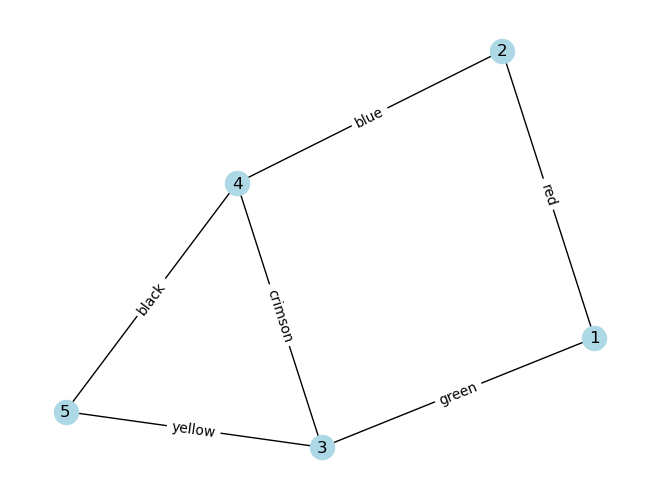

In [15]:
ug_from_csv_dataframe_graph = nx.from_pandas_edgelist(ug_from_csv_dataframe, "node1", "node2", edge_attr="relation")
vputil2.draw_ug_networkx_with_edge_labels(ug_from_csv_dataframe_graph, "relation")

#### Note that you can also use adjacency list encoded into a CSV file.

## Accessing the network graph data p232 9.4.3

### Read

#### Get edges of a graph with weight and sign

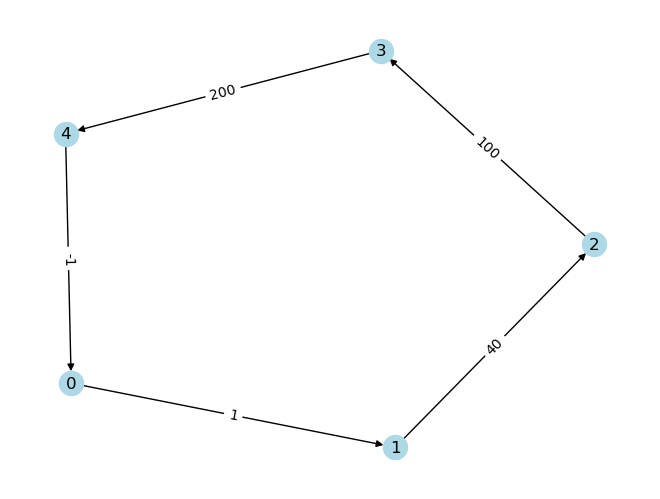

In [16]:
# Define the graph
dg_weighted_multirelation_readall = nx.DiGraph()
dg_weighted_multirelation_readall.add_edge('0','1', weight=1, sign='+')
dg_weighted_multirelation_readall.add_edge('1','2', weight=40, sign='+')
dg_weighted_multirelation_readall.add_edge('2','3', weight=100, sign='+')
dg_weighted_multirelation_readall.add_edge('3','4', weight=200, sign='+')
dg_weighted_multirelation_readall.add_edge('4','0', weight=-1, sign='-')

# Print graph with the "weight" relation displayed
vputil2.draw_dg_networkx_with_edge_labels(dg_weighted_multirelation_readall, "weight")


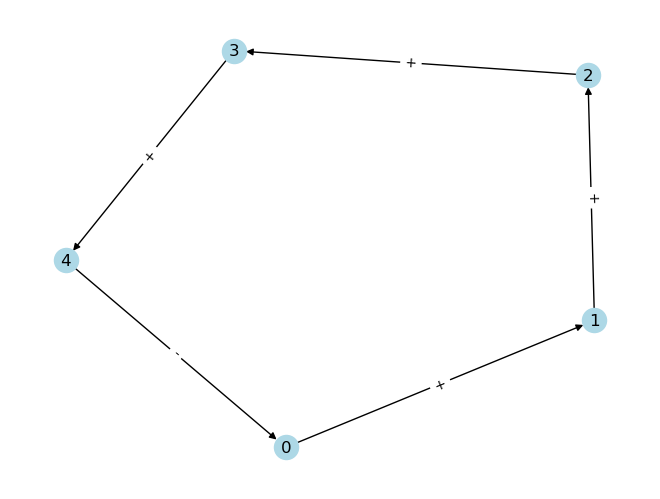

In [17]:
# Print graph with the "sign" relation displayed
vputil2.draw_dg_networkx_with_edge_labels(dg_weighted_multirelation_readall, "sign")

In [18]:
# Get data for all edges and their attributes for this graph (dg_weighted_multirelation_readall)
print(dg_weighted_multirelation_readall.edges(data=True))

[('0', '1', {'weight': 1, 'sign': '+'}), ('1', '2', {'weight': 40, 'sign': '+'}), ('2', '3', {'weight': 100, 'sign': '+'}), ('3', '4', {'weight': 200, 'sign': '+'}), ('4', '0', {'weight': -1, 'sign': '-'})]


#### Read nodes

In [19]:
# Get data for all nodes and their values for this graph (dg_weighted_multirelation_readall)
print(dg_weighted_multirelation_readall.nodes(data=True))

[('0', {}), ('1', {}), ('2', {}), ('3', {}), ('4', {})]


In [20]:
print(type(dg_weighted_multirelation_readall.nodes(data=True)))

<class 'networkx.classes.reportviews.NodeDataView'>


#### Get value for a relation for specific edge (in this case directed edge)

In [21]:
print(dg_weighted_multirelation_readall['3']['4']['weight'])

200


#### Get value for a relation for specific edge for a multigraph

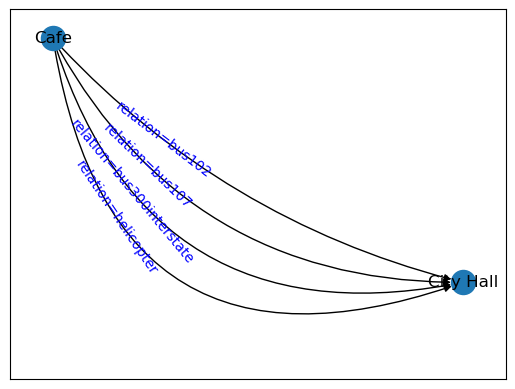

In [22]:
dg_multigraph_read_example = nx.MultiDiGraph()

dg_multigraph_read_example.add_edge('Cafe','City Hall', weight=15, relation="bus102")
dg_multigraph_read_example.add_edge('Cafe','City Hall', weight=60, relation="bus107")
dg_multigraph_read_example.add_edge('Cafe','City Hall', weight=36000, relation="bus300interstate")
dg_multigraph_read_example.add_edge('Cafe','City Hall', weight=10, relation="helicopter")



vputil2.draw_labeled_multigraph(dg_multigraph_read_example, "relation", ax=None)

In [23]:
print(dg_multigraph_read_example['Cafe']['City Hall'][2]['relation'])
print("Expected value: bus300interstate")

bus300interstate
Expected value: bus300interstate


## Useful operations on graphs using NetworkX

### Example 1: Bipartite graph projection for GPU purchasing reccomendation

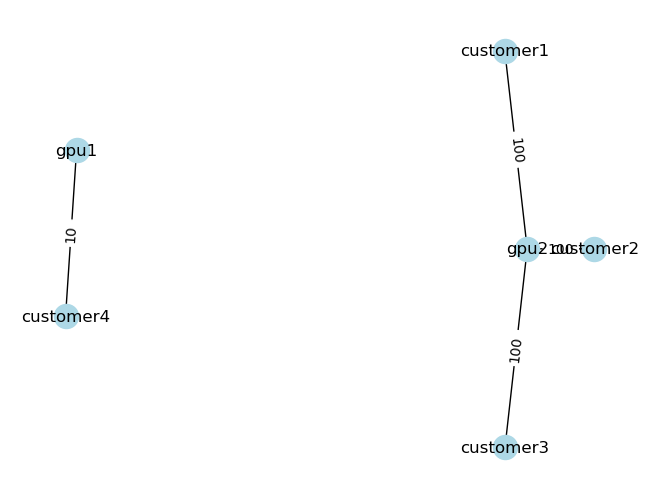

In [24]:
# Load the dataset of people and the GPUs they bought into a NetworkX object.
# This is a bipartite graph, when segmented by A = {gpu1, gpu2} and B = {customer1, customer2, customer3}.
ug_gpu_example = nx.read_edgelist(datapath+'gpu_example.txt')
vputil2.draw_dg_networkx_with_edge_labels(ug_gpu_example, "price")

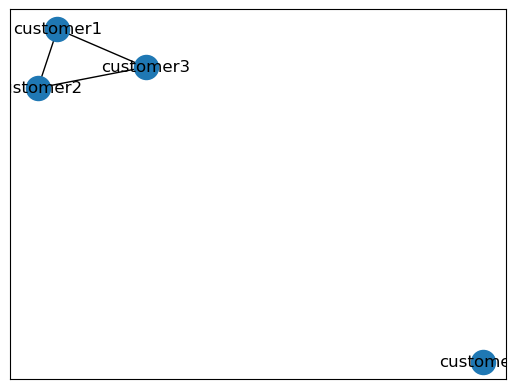

In [25]:
# Define the customer part of the bipartite graph and execute projection
customer_set = set(['customer1', 'customer2', 'customer3', 'customer4'])
customer_connectivity_network = nx.algorithms.bipartite.projected_graph(ug_gpu_example, customer_set)

nx.draw_networkx(customer_connectivity_network)

### Example 2: Local clustering coefficient to detect cross-domain experts in a company.

Nodes represent different workers.
Edges in the Example Technologies dataset represent that two workers have worked on the same project.

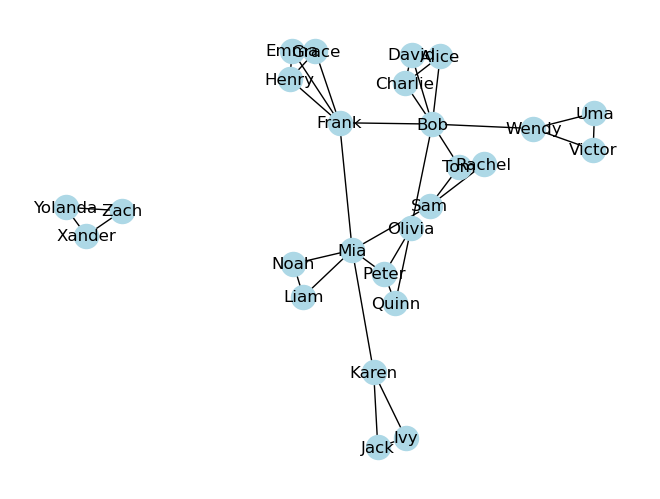

In [26]:
# Load the dataset
ug_example_technologies = nx.read_edgelist(datapath+"example_technologies_workers.txt")
vputil2.draw_ug_networkx_with_edge_labels(ug_example_technologies, attribute_name=None, pos=nx.spring_layout(ug_example_technologies, k=0.25))

In [27]:
# Calculate local clustering coefficient for each worker
print("Mia clustering: "+str(nx.clustering(ug_example_technologies, 'Mia')))
print("Bob clustering: "+str(nx.clustering(ug_example_technologies, 'Bob')))

# Local clustering coefficient for some highly interconnected workers
print("Rachel clustering: "+str(nx.clustering(ug_example_technologies, 'Rachel')))
print("Jack clustering: "+str(nx.clustering(ug_example_technologies, 'Jack')))

Mia clustering: 0.06666666666666667
Bob clustering: 0.14285714285714285
Rachel clustering: 1.0
Jack clustering: 1.0


### Example 3: Average clustering coefficient to detect global company cross-collaboration metric.
We can see that the Example Technologies group has two workers who collaborate with a lot of teams, which are Mia and Bob, and two workers who work in tightly knit groups and seldom collaborate with others.

But what if we want to know how collaborative the entire network is? That is, what if we want to know whenever on average everyone is likely to collaborate with everyone (low average clustering), or if everyone is likely to collaborate only with members of their small dedicated team (high average clustering)?

Example Technologies looks very silo'ed, that is, people tend not to collaborate with each other outside of their small teams, so we'd expect a hight average clustering value.

We can calculate average clustering in NetworkX:

In [28]:
print("Average clustering for Example Technologies is: ", str(nx.average_clustering(ug_example_technologies)))

Average clustering for Example Technologies is:  0.7503663003663004


### Example 4: Transitivity

#### What is transitivity?

Transitivity is calculated as: 

$$
T = \frac{3 \times \text{number of triangles}}{\text{number of triads}}
$$

Where a triangle is a group of three nodes {1,2,3} where between each nodes i,j there is an edge, and a triad is a group of three nodes {1,2,3} where there is an edge between each pair (i,j), except for one single pair.

So for example edge group {(1,2),(2,3),(3,1)} constitutes a triangle, and an edge group {(1,2),(2,3)} constitutes a triad, and edge group {(1,2)} is neither a triad, nor a triangle.

#### Onto the example

Let us look at ExampleCorp Shop now.

Node := Item in the shop

Edge (between nodes 1 and 2) := Item 1 (node 1) was bought in the same order as Item 2 (node 2).

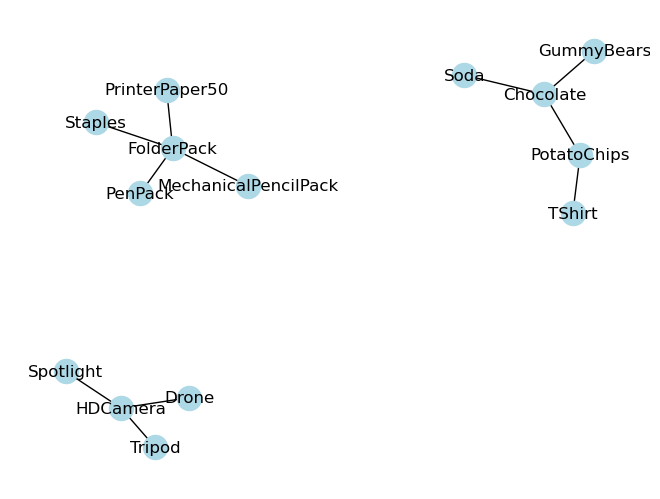

In [29]:
# Load the dataset
ug_examplecorp_shop = nx.read_edgelist(datapath+"examplecorp_shop_transitivity.txt")
vputil2.draw_ug_networkx_with_edge_labels(ug_examplecorp_shop, attribute_name=None, pos=nx.spring_layout(ug_examplecorp_shop, k=0.45))

In [30]:
# Measure transitivity of the network
print("ExampleCorp shop transitivity metric: "+str(nx.transitivity(ug_examplecorp_shop)))

ExampleCorp shop transitivity metric: 0


We have zero transitivity, which means that our customers never even once bought potentially related products together. In our example this is terrible from recommendation standpoint. Let's say we improved our recommendation engine and received new data after 6 months. Let us reevaluate transitivity on the new data:

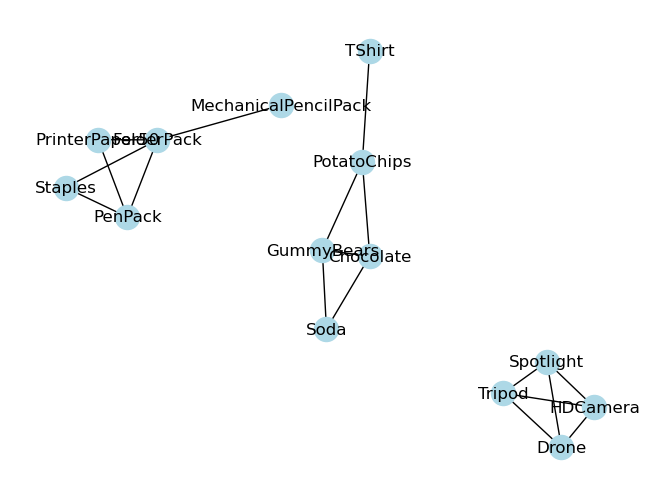

In [31]:
# Load the dataset
ug_examplecorp_shop_opt = nx.read_edgelist(datapath+"examplecorp_shop_transitivity_optimized.txt")
vputil2.draw_ug_networkx_with_edge_labels(ug_examplecorp_shop_opt, attribute_name=None, pos=nx.spring_layout(ug_examplecorp_shop_opt, k=0.55))

In [32]:
# Measure transitivity of the somewhat optimized network
print("ExampleCorp shop transitivity metric after optimization: "+str(nx.transitivity(ug_examplecorp_shop_opt)))

ExampleCorp shop transitivity metric after optimization: 0.7272727272727273


### Example 5: Fictional city "Zefetkov" map

#### Pulling the paths and the shortest path:

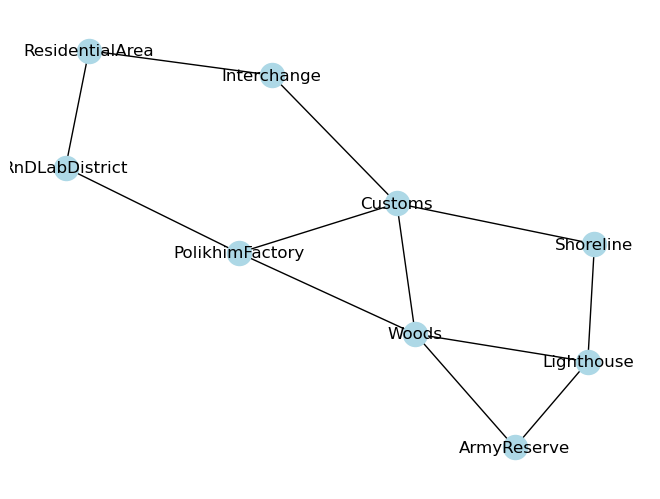

In [33]:
# Load the dataset
ug_zefetkov = nx.read_edgelist(datapath+"zefetkov_map.txt")
vputil2.draw_ug_networkx_with_edge_labels(ug_zefetkov, attribute_name=None, pos=nx.spring_layout(ug_zefetkov, k=0.40))

In [34]:
# Let's get ourselves all simple paths from ArmyReserve to ResidentialArea
print("All simple paths from the Army Reserve to the Residential Area:")
for path in nx.all_simple_paths(ug_zefetkov, "ArmyReserve", "ResidentialArea"):
    print(path)

All simple paths from the Army Reserve to the Residential Area:
['ArmyReserve', 'Lighthouse', 'Woods', 'PolikhimFactory', 'Customs', 'Interchange', 'ResidentialArea']
['ArmyReserve', 'Lighthouse', 'Woods', 'PolikhimFactory', 'RnDLabDistrict', 'ResidentialArea']
['ArmyReserve', 'Lighthouse', 'Woods', 'Customs', 'Interchange', 'ResidentialArea']
['ArmyReserve', 'Lighthouse', 'Woods', 'Customs', 'PolikhimFactory', 'RnDLabDistrict', 'ResidentialArea']
['ArmyReserve', 'Lighthouse', 'Shoreline', 'Customs', 'Interchange', 'ResidentialArea']
['ArmyReserve', 'Lighthouse', 'Shoreline', 'Customs', 'PolikhimFactory', 'RnDLabDistrict', 'ResidentialArea']
['ArmyReserve', 'Lighthouse', 'Shoreline', 'Customs', 'Woods', 'PolikhimFactory', 'RnDLabDistrict', 'ResidentialArea']
['ArmyReserve', 'Woods', 'PolikhimFactory', 'Customs', 'Interchange', 'ResidentialArea']
['ArmyReserve', 'Woods', 'PolikhimFactory', 'RnDLabDistrict', 'ResidentialArea']
['ArmyReserve', 'Woods', 'Lighthouse', 'Shoreline', 'Customs'

In [35]:
# Let's extract the shortest path and it's length.
print("The shortest path from the Army Reserve to the Residential Area:")
print(nx.shortest_path(ug_zefetkov, "ArmyReserve", "ResidentialArea"))
print("Length of the shortest path is "+str(nx.shortest_path_length(ug_zefetkov, "ArmyReserve", "ResidentialArea"))+".")

The shortest path from the Army Reserve to the Residential Area:
['ArmyReserve', 'Woods', 'Customs', 'Interchange', 'ResidentialArea']
Length of the shortest path is 4.


Let's check out all shortest paths from PolikhimFactory to the rest of the network:

In [36]:
print("Shortest paths from Polikhim Factory to the rest of the areas in the Zefetkov city:")
print(nx.shortest_path(ug_zefetkov, "PolikhimFactory"))

Shortest paths from Polikhim Factory to the rest of the areas in the Zefetkov city:
{'PolikhimFactory': ['PolikhimFactory'], 'Customs': ['PolikhimFactory', 'Customs'], 'Woods': ['PolikhimFactory', 'Woods'], 'RnDLabDistrict': ['PolikhimFactory', 'RnDLabDistrict'], 'Interchange': ['PolikhimFactory', 'Customs', 'Interchange'], 'Shoreline': ['PolikhimFactory', 'Customs', 'Shoreline'], 'Lighthouse': ['PolikhimFactory', 'Woods', 'Lighthouse'], 'ArmyReserve': ['PolikhimFactory', 'Woods', 'ArmyReserve'], 'ResidentialArea': ['PolikhimFactory', 'RnDLabDistrict', 'ResidentialArea']}


#### Figuring out the path to each location from the "Customs" location via BFS tree:

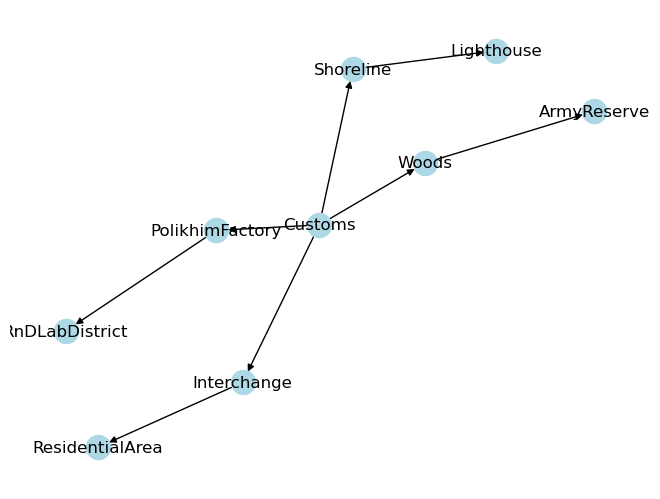

In [37]:
zefetkov_bfs_tree = nx.bfs_tree(ug_zefetkov, "Customs")
vputil2.draw_ug_networkx_with_edge_labels(zefetkov_bfs_tree, attribute_name=None, pos=nx.spring_layout(ug_zefetkov, k=0.40))

We can enhance our BFS tree by computing the lengths of the paths from Customs to every other node and attaching them to the graph:

{'Customs': Text(-0.012304176489473066, 0.02796240505585235, 'Customs\n(d=0)'),
 'Interchange': Text(-0.6060514396958474, 0.5164793805405992, 'Interchange\n(d=1)'),
 'PolikhimFactory': Text(0.6742219841257447, 0.34079324245474, 'PolikhimFactory\n(d=1)'),
 'Shoreline': Text(0.5308464296117008, -0.41231354307646695, 'Shoreline\n(d=1)'),
 'Woods': Text(-0.6168118709461338, -0.38875511383292866, 'Woods\n(d=1)'),
 'ResidentialArea': Text(-0.8024798890149111, 0.7466241595690343, 'ResidentialArea\n(d=2)'),
 'RnDLabDistrict': Text(1.0, 0.47357646406855014, 'RnDLabDistrict\n(d=2)'),
 'Lighthouse': Text(0.6142879042723219, -0.6448362659019109, 'Lighthouse\n(d=2)'),
 'ArmyReserve': Text(-0.7817089418634022, -0.6595307288774694, 'ArmyReserve\n(d=2)')}

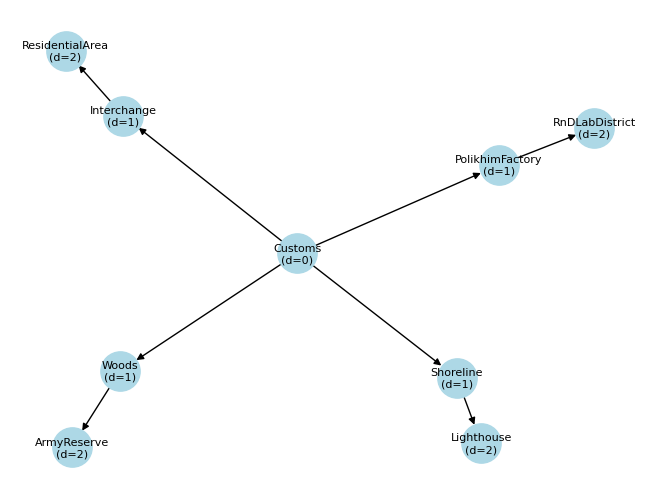

In [38]:
distances = nx.single_source_shortest_path_length(ug_zefetkov, "Customs")

# Layout
pos = nx.spring_layout(zefetkov_bfs_tree)

# Draw graph
nx.draw(zefetkov_bfs_tree, pos, with_labels=False, node_color="lightblue", node_size=800)

# Add distance labels next to nodes
nx.draw_networkx_labels(zefetkov_bfs_tree, pos,
    labels={node: f"{node}\n(d={distances[node]})" for node in zefetkov_bfs_tree.nodes()},
    font_size=8
)


Of course, NetworkX can also work with the definitions of path and distance where edges are weighted. Let's recreate the Zefetkov map with weights.

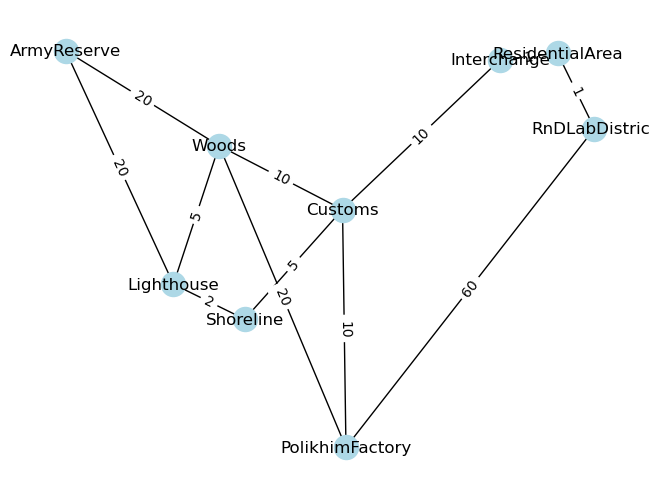

In [39]:
# Load the dataset
ug_zefetkov_w = nx.read_edgelist(datapath+"zefetkov_map_weighted.txt")
# Weights in NetworkX are an attraction force when used with spring layout, but this doesn't make sense for a city map! I want the opposite.
# I'll add "inverted_weight" to each edge and use that for the actual spring layout builder.
for u, v, d in ug_zefetkov_w.edges(data=True):
    d["inverted_weight"] = 1/d["weight"]

vputil2.draw_ug_networkx_with_edge_labels(ug_zefetkov_w, attribute_name='weight', pos=nx.spring_layout(ug_zefetkov_w, weight="inverted_weight", k=0.20))

In [40]:
# And now for the shortest paths
print(nx.shortest_path(ug_zefetkov_w, "ArmyReserve", "ResidentialArea", weight='weight'))

['ArmyReserve', 'Lighthouse', 'Shoreline', 'Customs', 'Interchange', 'ResidentialArea']


In [41]:
# More data on the weighted network

# Avg shortest path length - to understand how "sparse" your network is in terms of distances. Larger number = nodes on avg. spread further away.
print("Average shortest path length: "+str(nx.average_shortest_path_length(ug_zefetkov_w, weight='weight')))
# Diameter - maximal distance between two nodes in the network. In Zefetkov's case, will produce the estimation of traversal from one end to another.
print("Zefetkov diameter: "+str(nx.diameter(ug_zefetkov_w, weight='weight')))
# Eccentricity - maximal distance of each node from every other node in the graph. The lower the eccentricity of node N, the easier it is to get from
# N to every other node in the city.
print("Zefetkov eccentricity: "+str(nx.eccentricity(ug_zefetkov_w, weight='weight')))
# Radius - minimal eccentricity. Makes sense, because by selecting the node N with minimal eccentricity, we can get everywhere with roughly the same 
# cost.
print("Zefetkov radius: "+str(nx.radius(ug_zefetkov_w, weight='weight')))

Average shortest path length: 16.75
Zefetkov diameter: 39
Zefetkov eccentricity: {'Interchange': 37, 'Customs': 27, 'PolikhimFactory': 37, 'Woods': 22, 'Lighthouse': 20, 'Shoreline': 22, 'ArmyReserve': 39, 'ResidentialArea': 38, 'RnDLabDistrict': 39}
Zefetkov radius: 20


In [42]:
# Periphery - nodes that are the furthest from the network center. Defined as nodes, whose eccentricity equals to the diameter of the network. 
# Since eccentricity is a good estimation for how easy it is to get to the node from other nodes, this makes sense.
print("Locations that are at Zefetkov periphery: "+str(nx.periphery(ug_zefetkov_w, weight='weight')))
# Center - self-explanatory. Defined as a group of nodes, the eccentricity of which equals to the network radius. Makes sense, since it's easy to get
# to every place in the city from it's center, which minimal eccentricity implies.
print("Locations that are at Zefetkov center: "+str(nx.center(ug_zefetkov_w, weight='weight')))

Locations that are at Zefetkov periphery: ['ArmyReserve', 'RnDLabDistrict']
Locations that are at Zefetkov center: ['Lighthouse']


And that's about it with the examples of network data processing.

## NetworkX graph visualization

NetworkX uses matplotlib under the hood for visualization.

To display graphs, NetworkX must determine node positions, and it uses layouts for it.

One frequently used layout is **spring layout**, which uses Fruchterman-Reingold force-directed algorithm for node positioning. A very simplified explanation of what it does: Nodes repel each other and edges act like "springs" (hence the name, "spring layout") that pull them together. In weighted graphs, the larger the weight of the edge, the stronger the force pulling two nodes together, rendering them closer to each other.

Some other layouts available are:
1. random_layout() - self-explanatory, positions nodes uniformly at random in a unit square.
2. circular_layout() - positions nodes on a circle.
3. shell_layout() - concentric circles around some center.
4. Many more specialized layouts

Let us demonstrate some of these layouts.

### Examples of layouts

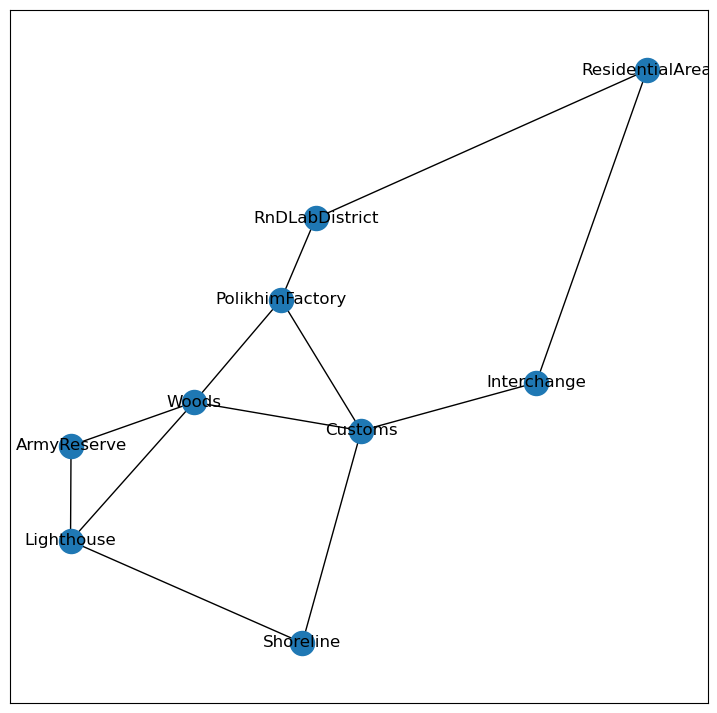

In [43]:
# Let's reuse Zefetkov network.

# Since matplotlib is used for the backend, we can use it's functions. Full overview is outside of the scope of this notebook and university
# presentation, but let's increase the canvas size to not have the labels get cut off.
# The numbers are in inches, because of course they are...
mpl.pyplot.figure(1, figsize=(9,9))

# Spring layout
nx.draw_networkx(ug_zefetkov_w, nx.spring_layout(ug_zefetkov_w))
mpl.pyplot.show()

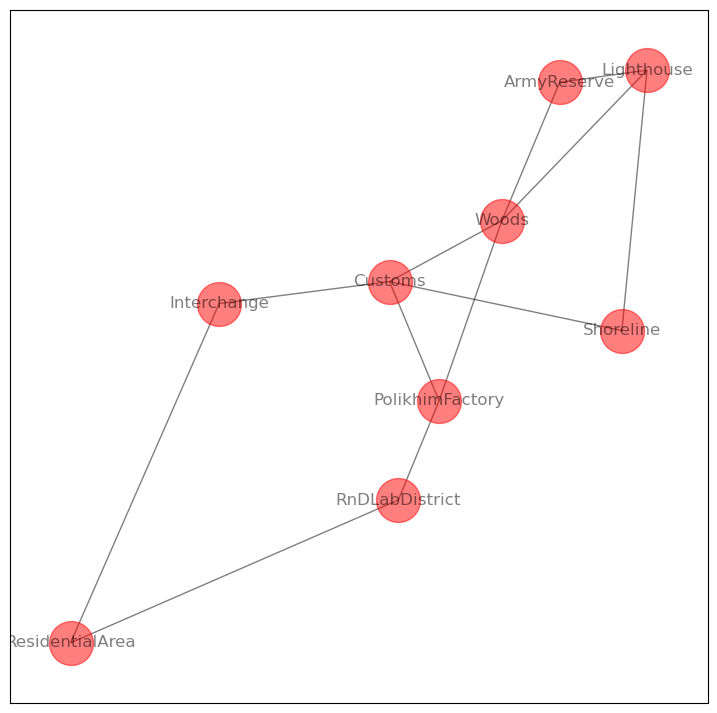

In [44]:
# We'll print the graph on a bigger canvas, no weights yet.
mpl.pyplot.figure(1, figsize=(9,9))

# Draw graph using spring layout.
# We can set node_size, node_color and even alpha!
nx.draw_networkx(ug_zefetkov_w, nx.spring_layout(ug_zefetkov_w), node_size=1000, node_color='#ff0000', alpha=0.5)

mpl.pyplot.show()

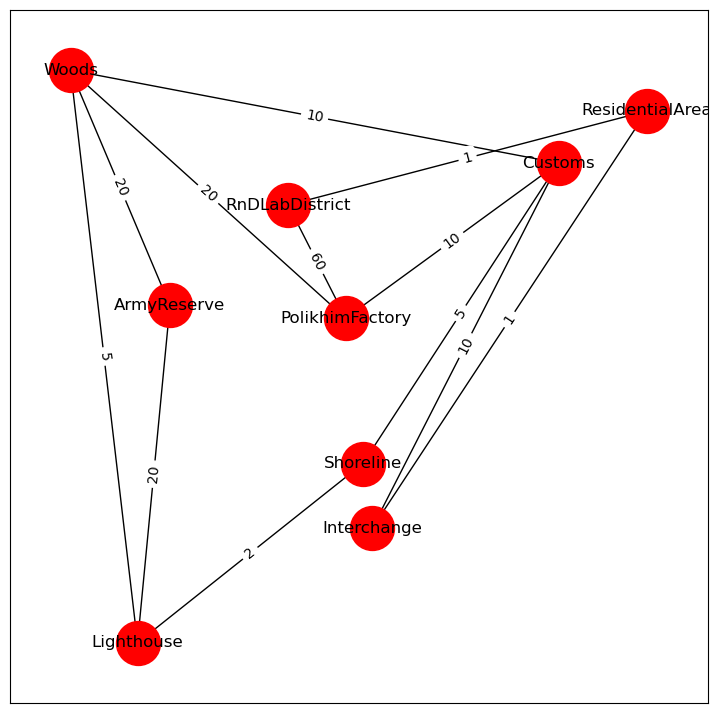

In [45]:
# We'll print the graph with the weights now.

mpl.pyplot.figure(1, figsize=(9,9))

# pos contains layout data
pos = nx.random_layout(ug_zefetkov_w)

# Draw graph using random layout.
nx.draw_networkx(ug_zefetkov_w, pos, node_size=1000, node_color='#ff0000', alpha=1)

# Drawing labels can be achieved via draw_networkx_labels(...), but first we need to get the labels to print...
labels = nx.get_edge_attributes(ug_zefetkov_w, "weight")
nx.draw_networkx_edge_labels(ug_zefetkov_w, pos, edge_labels=labels)
mpl.pyplot.show()

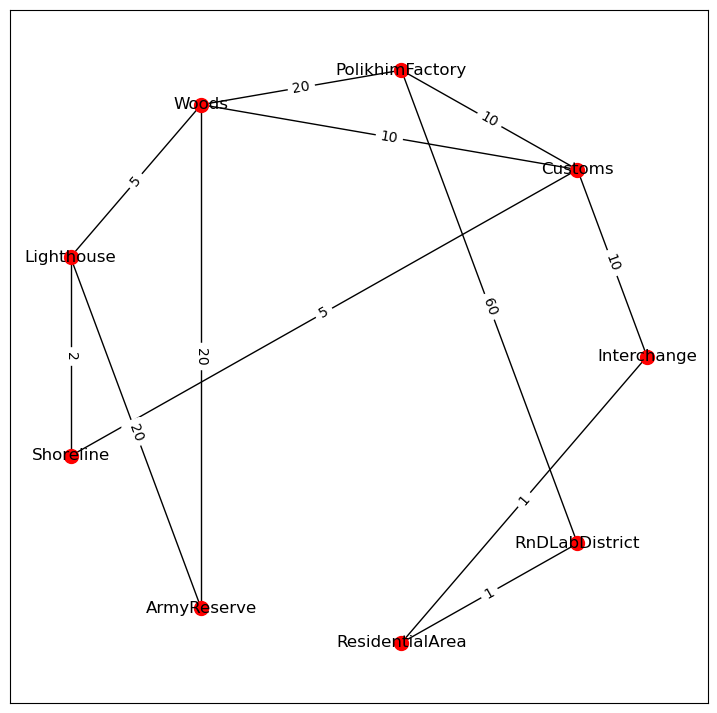

In [46]:
# Same graph, circular layout.

mpl.pyplot.figure(1, figsize=(9,9))

# pos contains layout data
pos = nx.circular_layout(ug_zefetkov_w)

# Draw graph using selected layout.
nx.draw_networkx(ug_zefetkov_w, pos, node_size=100, node_color='#ff0000', alpha=1)

# Drawing labels can be achieved via draw_networkx_labels(...), but first we need to get the labels to print...
labels = nx.get_edge_attributes(ug_zefetkov_w, "weight")
nx.draw_networkx_edge_labels(ug_zefetkov_w, pos, edge_labels=labels)
mpl.pyplot.show()

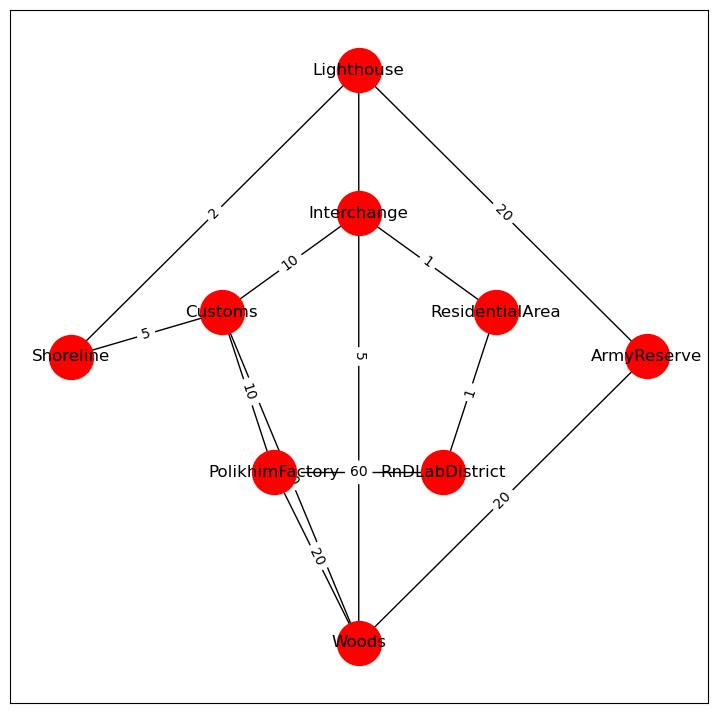

In [47]:
# Same graph, shell layout, two layers.

mpl.pyplot.figure(1, figsize=(9,9))

# pos contains layout data
shells = [["Interchange", "Customs", "PolikhimFactory", "RnDLabDistrict", "ResidentialArea"], ["Shoreline", "Woods", "ArmyReserve", "Lighthouse"]]
pos = nx.shell_layout(ug_zefetkov_w, shells)

# Draw graph using selected layout.
nx.draw_networkx(ug_zefetkov_w, pos, node_size=1000, node_color='#ff0000', alpha=1)

# Drawing labels can be achieved via draw_networkx_labels(...), but first we need to get the labels to print...
labels = nx.get_edge_attributes(ug_zefetkov_w, "weight")
nx.draw_networkx_edge_labels(ug_zefetkov_w, pos, edge_labels=labels)
mpl.pyplot.show()

### NetworkX and coloring
NetworkX uses Matplotlib under the hood, so we have access to colormaps, which explain how to use values provided to node_color (so Colormaps define coloring schemes). Let's see some examples, first with simple coloring, then with Colormap usage.


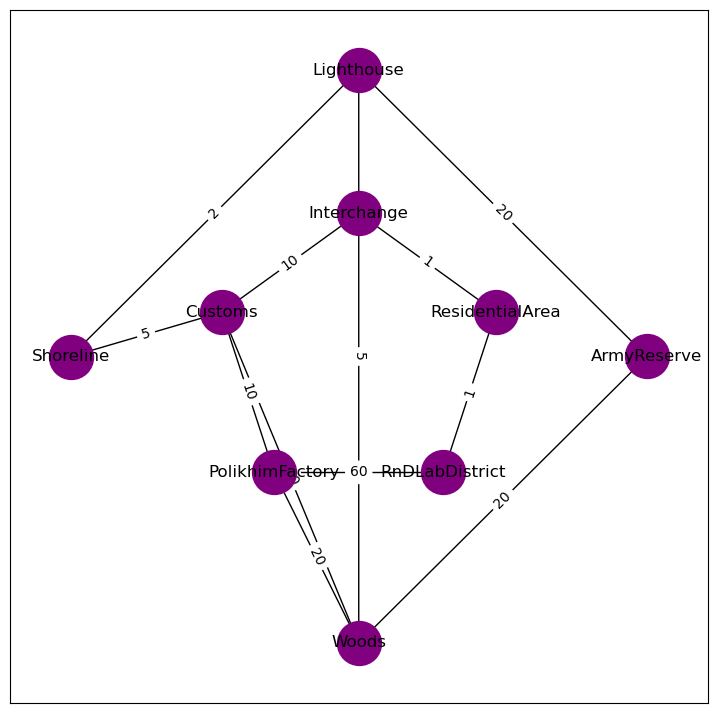

In [48]:
# Let's draw the shell layout graph using purple color.

mpl.pyplot.figure(1, figsize=(9,9))

# pos contains layout data
shells = [["Interchange", "Customs", "PolikhimFactory", "RnDLabDistrict", "ResidentialArea"], ["Shoreline", "Woods", "ArmyReserve", "Lighthouse"]]
pos = nx.shell_layout(ug_zefetkov_w, shells)

# Draw graph using selected layout.
nx.draw_networkx(ug_zefetkov_w, pos, node_size=1000, node_color='purple', alpha=1)

# Drawing labels can be achieved via draw_networkx_labels(...), but first we need to get the labels to print...
labels = nx.get_edge_attributes(ug_zefetkov_w, "weight")
nx.draw_networkx_edge_labels(ug_zefetkov_w, pos, edge_labels=labels)
mpl.pyplot.show()


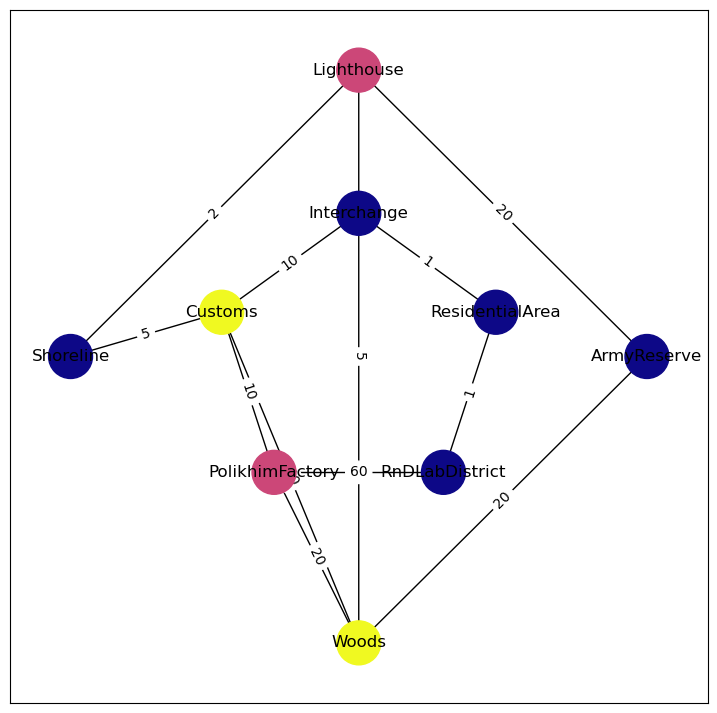

In [49]:
# Now let's draw it by coloring via Plasma colormap, with degree of each node defining the color value.
# Read about Plasma colormap in Matplotlib docs, but the basics are: The higher the number, the brighter the node.
# Link to docs: https://matplotlib.org/stable/users/explain/colors/colormaps.html

node_color_via_degree = [ug_zefetkov_w.degree(node) for node in ug_zefetkov_w.nodes()]

mpl.pyplot.figure(1, figsize=(9,9))

# pos contains layout data
shells = [["Interchange", "Customs", "PolikhimFactory", "RnDLabDistrict", "ResidentialArea"], ["Shoreline", "Woods", "ArmyReserve", "Lighthouse"]]
pos = nx.shell_layout(ug_zefetkov_w, shells)

# Draw graph using selected layout.
nx.draw_networkx(ug_zefetkov_w, pos, node_size=1000, node_color=node_color_via_degree, cmap=mpl.cm.plasma, alpha=1)

# Drawing labels can be achieved via draw_networkx_labels(...), but first we need to get the labels to print...
labels = nx.get_edge_attributes(ug_zefetkov_w, "weight")
nx.draw_networkx_edge_labels(ug_zefetkov_w, pos, edge_labels=labels)
mpl.pyplot.show()


## NetworkX and graph connectedness

Often we are interested in whenever the network graph is connected.

For example, let's say our network is the Internet. We are definitely interested in connecting all parts of the world together, therefore we are interested in whenever our network graph is connected, and what connected components exist. Connected components in this case will represent regions in the world that comprise their own local networks, and the biggest connected component is likely the Internet itself.

Let's show some examples.

### Examples

In [50]:
# Let's check if the shell graph from before is a connected graph via .is_connected()
print(nx.is_connected(ug_zefetkov_w))

True


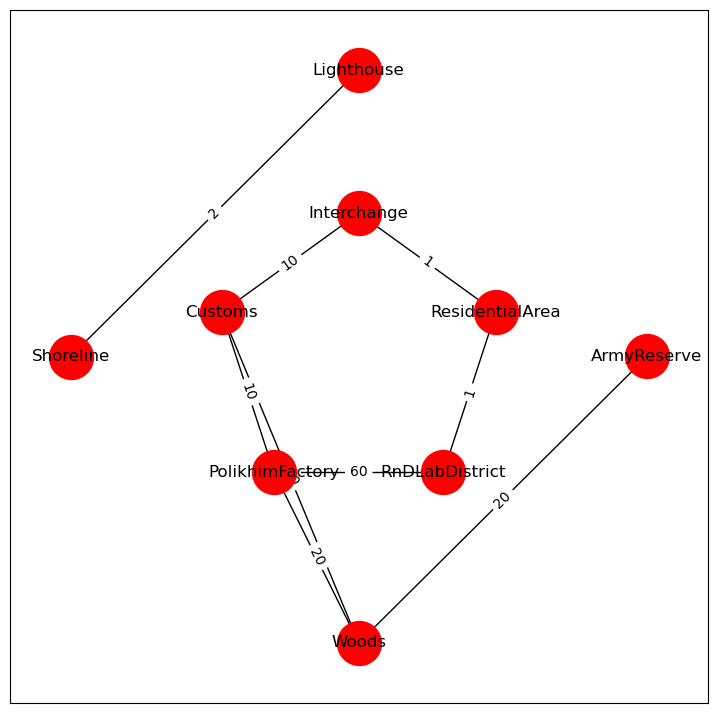

In [51]:
# Let's disconnect Lighthouse and Shoreline, link them together and check which connected components 
# (components where each node is linked to "the whole", and not outside of it) exist

ebunch_for_removal = []

for s, t, attrib in ug_zefetkov_w.edges(data=True):
    if s == 'Lighthouse' or s == 'Shoreline' or t == 'Lighthouse' or t == 'Shoreline':
        ebunch_for_removal.append((s,t))

# Create a deep copy of the weighted Zefetkov graph
ug_zefetkov_w_copy = copy.deepcopy(ug_zefetkov_w)

# Remove all edges for Lighthouse and Shoreline
ug_zefetkov_w_copy.remove_edges_from(ebunch_for_removal)

# Add an edge between Lighthouse and Shoreline back
ug_zefetkov_w_copy.add_edge('Shoreline', 'Lighthouse', weight=2)

mpl.pyplot.figure(1, figsize=(9,9))

# pos contains layout data
shells = [["Interchange", "Customs", "PolikhimFactory", "RnDLabDistrict", "ResidentialArea"], ["Shoreline", "Woods", "ArmyReserve", "Lighthouse"]]
pos = nx.shell_layout(ug_zefetkov_w_copy, shells)

# Draw graph using selected layout.
nx.draw_networkx(ug_zefetkov_w_copy, pos, node_size=1000, node_color='#ff0000', alpha=1)

# Drawing labels can be achieved via draw_networkx_labels(...), but first we need to get the labels to print...
labels = nx.get_edge_attributes(ug_zefetkov_w_copy, "weight")
nx.draw_networkx_edge_labels(ug_zefetkov_w_copy, pos, edge_labels=labels)
mpl.pyplot.show()
    
        


In [52]:
# Now let's check if the graph is connected (we know it isn't) and which connected components exist.

print("Is Zefetkov copy a connected network? "+str(nx.is_connected(ug_zefetkov_w_copy)))
print("Amount of connected components: "+str(nx.number_connected_components(ug_zefetkov_w_copy)))
print("Connected components list:")
print(sorted(nx.connected_components(ug_zefetkov_w_copy)))


Is Zefetkov copy a connected network? False
Amount of connected components: 2
Connected components list:
[{'PolikhimFactory', 'RnDLabDistrict', 'Woods', 'ResidentialArea', 'ArmyReserve', 'Interchange', 'Customs'}, {'Shoreline', 'Lighthouse'}]


In [53]:
# Let's also check which connected component does node Shoreline belong to
print(nx.node_connected_component(ug_zefetkov_w_copy, 'Shoreline'))

{'Shoreline', 'Lighthouse'}


Is DG-3-Problematic strongly connected? False
Is DG-3-Problematic weakly connected? True


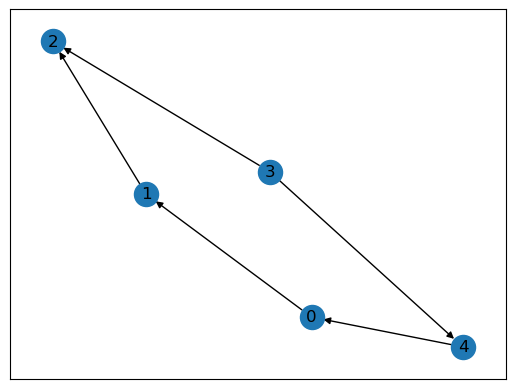

In [54]:
# Note the "weakly connected" and "strongly connected" notions for directed graphs!
dg_3_problematic = nx.DiGraph()
dg_3_problematic.add_edge('0','1')
dg_3_problematic.add_edge('1','2')
dg_3_problematic.add_edge('3','2')
dg_3_problematic.add_edge('3','4')
dg_3_problematic.add_edge('4','0')

nx.draw_networkx(dg_3_problematic)

# This network is not strongly connected, because 3 is unreachable from, for example, node 1.
print("Is DG-3-Problematic strongly connected? "+str(nx.is_strongly_connected(dg_3_problematic)))

# However, it is weakly connected, because in an undirected graph version of the same network,
# every node is reachable from every node (including node 3 from any other node)
print("Is DG-3-Problematic weakly connected? "+str(nx.is_weakly_connected(dg_3_problematic)))

## NetworkX and network robustness

In some contexts, network resilience to damage is important to us. For example, in public transportation networks, it is important to us that every place in the city is accessible via the network, and as a consequence it is important to us that damage to a specific route (i.e. a missing node or edge) does not disable the ability of passengers to travel to a certain destination.

Let us call the measure of this quality "network robustness".

NetworkX has some tools that allow us to evaluate network robustness, in the form of the following utilities: 
- node_connectivity(...) will produce a minimal amount of nodes that, if removed, will create separate connected components.
- minimum_node_cut(...) will produce the node list of nodes, the amount of which was calculated using node_connectivity(...)
- edge_connectivity(...) is same as node_connectivity(...) but for nodes.
- minimum_edge_cut(...) is the same as minimum_node_cut(...) but for edges.

Note that you can specify the source and target for each function, which will calculate the above properties while specifically taking into account the ability of getting from source to target (set via s=..., t=...).

Let us see examples.

### Examples

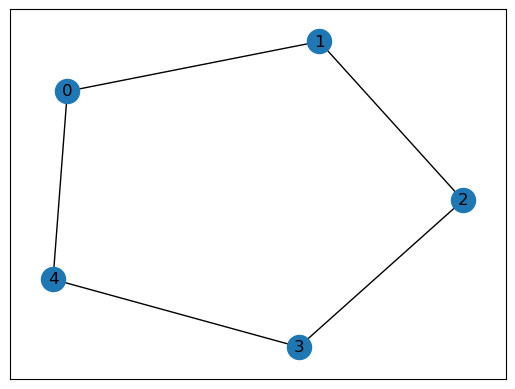

In [55]:
# Let's create an example network
ug_robustness1 = nx.Graph()
ug_robustness1.add_edge('0','1')
ug_robustness1.add_edge('1','2')
ug_robustness1.add_edge('2','3')
ug_robustness1.add_edge('3','4')
ug_robustness1.add_edge('4','0')
nx.draw_networkx(ug_robustness1)

Clearly, this network can survive the removal of two edges, or two nodes, before we lose the ability to travel from certain nodes to certain nodes.
Let's see the specifics.

In [56]:
# Let's see the minimal amount of nodes we need to remove to "hurt" the network functionality using node_connectivity(...).
print("Minimal amount of nodes to remove to lose connectedness of the network: "+str(nx.node_connectivity(ug_robustness1)))
# Let us also see which nodes exactly need to be removed via minimum_node_cut(...).
print("Minimum node cut: "+str(nx.minimum_node_cut(ug_robustness1)))

Minimal amount of nodes to remove to lose connectedness of the network: 2
Minimum node cut: {'0', '3'}


In [57]:
# Same with edges via edge_connectivity(...) and minimum_edge_cut(...)
print("Minimal amount of edges to remove to lose connectedness of the network: "+str(nx.edge_connectivity(ug_robustness1)))
print("Minimum edge cut: "+str(nx.minimum_edge_cut(ug_robustness1)))

Minimal amount of edges to remove to lose connectedness of the network: 2
Minimum edge cut: {('4', '3'), ('2', '3')}


In [58]:
# We can also check the above for specifically the Source and Target nodes, checking how to impact a link between them specifically (node or edge).
print("Minimal amount of nodes to remove to lose connectedness of the network (for 4->1): "+str(nx.node_connectivity(ug_robustness1, s='4', t='1')))
print("Minimum node cut (for 4->1): "+str(nx.minimum_node_cut(ug_robustness1, s='4', t='1')))
print("Minimal amount of edges to remove to lose connectedness of the network (for 4->1): "+str(nx.edge_connectivity(ug_robustness1, s='4', t='1')))
print("Minimum edge cut (for 4->1): "+str(nx.minimum_edge_cut(ug_robustness1, s='4', t='1')))

Minimal amount of nodes to remove to lose connectedness of the network (for 4->1): 2
Minimum node cut (for 4->1): {'0', '2'}
Minimal amount of edges to remove to lose connectedness of the network (for 4->1): 2
Minimum edge cut (for 4->1): {('0', '1'), ('2', '1')}


## NetworkX and network centrality and influence in the network

Sometimes we want to know how "central" the node is, that is, how "close" it is to the center of the network. Depending on the definition of "centrality", there are several ways of producing this information given a certain network.

Formula information is either taken from the NetworkX wiki pages, or found in other sources from the algorithm names.

### Degree Centrality

First, let us use the **degree centrality**: 
Let **v** be vertex in the network **G**. Then, the degree centrality of **v** is defined as such:
$$
\text{degree\_centrality}(v) = \frac{ degree(v) }{ \text{amount\_of\_nodes} (G)}
$$
In directed graphs, this metric will be split into **in-degree centrality and out-degree centrality (by direction)**, and will be calculated using different functions.

### Closeness Centrality

Additionally, let us look at the second possible way to determine centrality, the **closeness centrality** definition:
Let **v** be vertex in the network **G**, which contains **n** nodes total (including **v**). Then, the closeness centrality of **v** is defined as such:
$$
\text{closeness\_centrality}(v) = \frac{ n-1 }{ \sum_{u=1}^{n-1} \text{distance\_between\_nodes}(u,v) }
$$
Note: For directed graphs, distance_between_nodes will be computed as the incoming distance to **v**. Act on G.reverse() to use outward distance.

### Betweenness Centrality

Let us look at the third possible way to determine centrality, the **betweenness centrality** definition:
Let **v** be vertex in the network **G**, which contains **n** nodes total (including **v**). Then, the closeness centrality of **v** is defined as such:
$$
\text{betweenness\_centrality}(v) = \sum_{s,t\in P} \frac{ \sigma(s,t|v) }{ \sigma(s,t) }
$$
Note: P is a set of nodes, but in the case of calculating betweenness centrality for a node v in network G, it's effectively P=G.

### PageRank

Algorithm, that was originally created to rank web pages and was (is?) used by Google.

### Summary

Degree centrality approximates the centrality by counting the nodes with more edges connected to them as the more "central" ones. In a city scenario, this often makes a lot of sense, but this is not always correct.

Closeness centrality, on the other hand, approximates the center to be the node(s), from which it's (on average) "faster" to reach other nodes (more specifically, the distance on average is lower).

Betweenness centrality calculates the number of shortest paths between each node in the graph, that go through the node v for which we calculate centrality. Then, this number is divided by the number of shortest paths that don't go through v. The idea is that if more shortest paths do go through v, then it's more "central" to the graph, and thus it's ratio (betweenness centrality) will be higher.

PageRank is an algorithm that Google used to rank search results (and maybe uses it today? This was written in 2025). It's too complex to summarize, but you can check out this [Wikipedia article](https://en.wikipedia.org/wiki/PageRank) to information on how it works. Alternatively, check out "Page, Lawrence; Brin, Sergey; Motwani, Rajeev and Winograd, Terry, The PageRank citation ranking: Bringing order to the Web. 1999" paper.

### Examples
Let's reuse Zefetkov network graph and begin calculating centrality in various ways for "Customs".

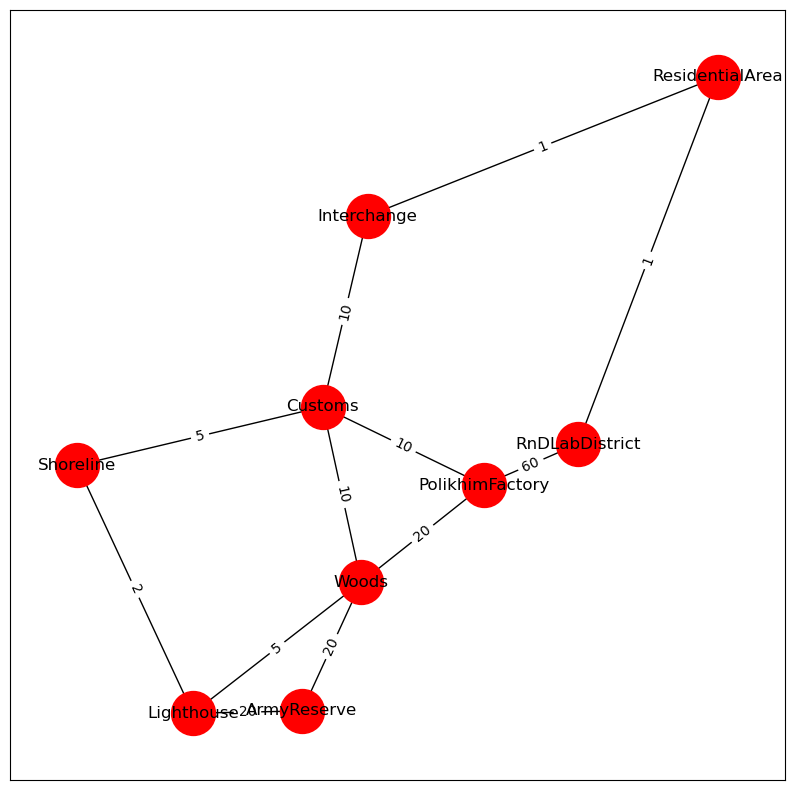

In [59]:
# Let's reuse Zefetkov for centrality calculations. To remind us how it looks, we'll display it:

mpl.pyplot.figure(1, figsize=(10,10))

# pos contains layout data
pos = nx.spring_layout(ug_zefetkov_w)

# Draw graph using random layout.
nx.draw_networkx(ug_zefetkov_w, pos, node_size=1000, node_color='#ff0000', alpha=1)

# Drawing labels can be achieved via draw_networkx_labels(...), but first we need to get the labels to print...
labels = nx.get_edge_attributes(ug_zefetkov_w, "weight")
nx.draw_networkx_edge_labels(ug_zefetkov_w, pos, edge_labels=labels)
mpl.pyplot.show()

In [60]:
# Let's calculate centrality for Customs
print("Calculation of centrality for Customs using different algorithms.")
print("Degree centrality: "+str(nx.degree_centrality(ug_zefetkov_w)['Customs']))
print("Closeness centrality: "+str(nx.closeness_centrality(ug_zefetkov_w)['Customs']))
print("Betweenness centrality: "+str(nx.betweenness_centrality(ug_zefetkov_w)['Customs']))
sub_z_bt = ['Customs', 'Shoreline', 'Woods']
print("Betweenness (subset): "+str(nx.betweenness_centrality_subset(ug_zefetkov_w, sources=sub_z_bt, targets=sub_z_bt)['Customs']))
print("PageRank: "+str(nx.pagerank(ug_zefetkov_w)['Customs']))


Calculation of centrality for Customs using different algorithms.
Degree centrality: 0.5
Closeness centrality: 0.6666666666666666
Betweenness centrality: 0.363095238095238
Betweenness (subset): 0.5
PageRank: 0.13051160385778696


This concludes the demonstration of various kinds of centrality calculations for a given vertex in a given network graph.

## NetworkX and future network change prediction

There are many cases, where network information is not static and is prone to change. For example, Internet is constantly changing, with endpoints connecting to the network and disconnecting without notice. Another good example is a social network, where people interact with other people and add or remove friends from their friend list.

This information is important when building a reccommendation engine: When we analyze a network that represents orders from customers, we want to be able to predict which items the customers are likely to buy, giving the chance. This is akin to predicting a new edge in the network between nodes.

NetworkX gives us a number of indicators and information sources to make such predictions:
- Common neighbor count
- Jaccard coefficient
- Resource allocation
- Preferential attachment

Let us see how we can extract these indicators by inspecting some examples.

### Example: Link prediction via common neighbors

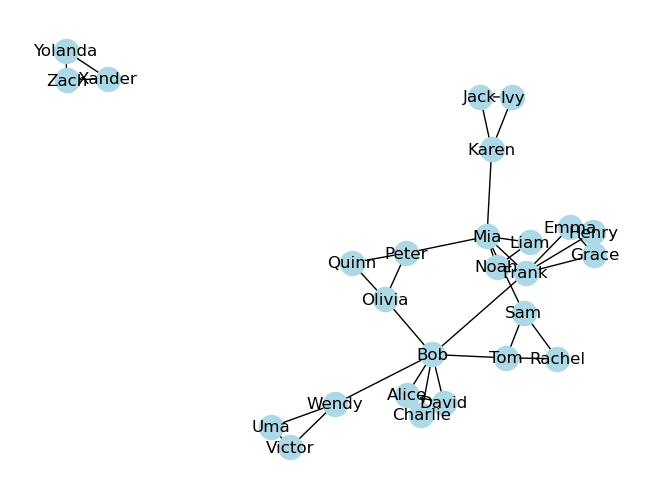

In [61]:
# Let's remind ourselves about the structure of Example Technologies corporation
vputil2.draw_ug_networkx_with_edge_labels(ug_example_technologies, attribute_name=None, pos=nx.spring_layout(ug_example_technologies, k=0.25))

In [62]:
# Now, let's calculate for each pair of nodes how many common neighbours they have. This will be done via non_edges.
# Note that in the context of Example Technologies, "common neighbour" between nodes A and B means a person with which
# both A and B have worked on some project at some time.

# Format: (source_node, target_node, amount of common neighbours)
common_neighbors_count = [(edge[0], edge[1], len(list(nx.common_neighbors(ug_example_technologies, edge[0], edge[1])))) for edge in nx.non_edges(ug_example_technologies)]
print("Common neightbors count: "+str(common_neighbors_count))


Common neightbors count: [('Yolanda', 'Rachel', 0), ('Yolanda', 'Tom', 0), ('Yolanda', 'Peter', 0), ('Yolanda', 'Charlie', 0), ('Yolanda', 'Alice', 0), ('Yolanda', 'Frank', 0), ('Yolanda', 'Victor', 0), ('Yolanda', 'Wendy', 0), ('Yolanda', 'Jack', 0), ('Yolanda', 'Ivy', 0), ('Yolanda', 'Quinn', 0), ('Yolanda', 'Henry', 0), ('Yolanda', 'Karen', 0), ('Yolanda', 'Bob', 0), ('Yolanda', 'Uma', 0), ('Yolanda', 'Liam', 0), ('Yolanda', 'Mia', 0), ('Yolanda', 'Noah', 0), ('Yolanda', 'Sam', 0), ('Yolanda', 'Grace', 0), ('Yolanda', 'David', 0), ('Yolanda', 'Olivia', 0), ('Yolanda', 'Emma', 0), ('Grace', 'Tom', 0), ('Grace', 'Zach', 0), ('Grace', 'Peter', 0), ('Grace', 'Charlie', 0), ('Grace', 'Xander', 0), ('Grace', 'Alice', 0), ('Grace', 'Victor', 0), ('Grace', 'Wendy', 0), ('Grace', 'Jack', 0), ('Grace', 'Ivy', 0), ('Grace', 'Quinn', 0), ('Grace', 'Karen', 0), ('Grace', 'Bob', 1), ('Grace', 'Uma', 0), ('Grace', 'Liam', 0), ('Grace', 'Mia', 1), ('Grace', 'Noah', 0), ('Grace', 'Sam', 0), ('Grace'

In [63]:
# That's a very large result. Let's filter out those that don't have any common neighbors.
common_neighbors_count_nonzero = []

for triplet in common_neighbors_count:
    if triplet[2] != 0:
        common_neighbors_count_nonzero.append(triplet)

print("Non-zero common neighbors count: "+str(common_neighbors_count_nonzero))

Non-zero common neighbors count: [('Grace', 'Bob', 1), ('Grace', 'Mia', 1), ('Alice', 'Tom', 1), ('Alice', 'Frank', 1), ('Alice', 'Wendy', 1), ('Alice', 'Olivia', 1), ('Frank', 'Karen', 1), ('Frank', 'Tom', 1), ('Frank', 'Peter', 1), ('Frank', 'Liam', 1), ('Frank', 'Noah', 1), ('Frank', 'Charlie', 1), ('Frank', 'Sam', 1), ('Frank', 'David', 1), ('Frank', 'Wendy', 1), ('Frank', 'Olivia', 1), ('Victor', 'Bob', 1), ('Ivy', 'Mia', 1), ('Quinn', 'Bob', 1), ('Quinn', 'Mia', 1), ('Henry', 'Bob', 1), ('Henry', 'Mia', 1), ('Karen', 'Peter', 1), ('Karen', 'Liam', 1), ('Karen', 'Noah', 1), ('Karen', 'Sam', 1), ('Bob', 'Peter', 1), ('Bob', 'Uma', 1), ('Bob', 'Mia', 1), ('Bob', 'Sam', 1), ('Bob', 'Rachel', 1), ('Bob', 'Emma', 1), ('Noah', 'Peter', 1), ('Noah', 'Sam', 1), ('Sam', 'Peter', 1), ('Sam', 'Liam', 1), ('Olivia', 'Tom', 1), ('Olivia', 'Mia', 1), ('Olivia', 'Charlie', 1), ('Olivia', 'David', 1), ('Olivia', 'Wendy', 1), ('Tom', 'Mia', 1), ('Tom', 'Charlie', 1), ('Tom', 'David', 1), ('Tom', '

It would make sense to say that there's a higher probability for the people from the list above to work with each other.

### Example: Link prediction via Jaccard coefficient (Jaccard index)

In [64]:
# It's very close to the previous example, but instead of calculating common neighbors count, we calculate Jaccard coefficient.
# Format: (source_node, target_node, jaccard_coefficient)
jaccard_coefficient_iterator = nx.jaccard_coefficient(ug_example_technologies)
jaccard_coefficient_list = []
for s, t, c in jaccard_coefficient_iterator:
    jaccard_coefficient_list.append((s, t, c))
    print(f"({s},{t}) -> {c:.8f}")

(Yolanda,Rachel) -> 0.00000000
(Yolanda,Tom) -> 0.00000000
(Yolanda,Peter) -> 0.00000000
(Yolanda,Charlie) -> 0.00000000
(Yolanda,Alice) -> 0.00000000
(Yolanda,Frank) -> 0.00000000
(Yolanda,Victor) -> 0.00000000
(Yolanda,Wendy) -> 0.00000000
(Yolanda,Jack) -> 0.00000000
(Yolanda,Ivy) -> 0.00000000
(Yolanda,Quinn) -> 0.00000000
(Yolanda,Henry) -> 0.00000000
(Yolanda,Karen) -> 0.00000000
(Yolanda,Bob) -> 0.00000000
(Yolanda,Uma) -> 0.00000000
(Yolanda,Liam) -> 0.00000000
(Yolanda,Mia) -> 0.00000000
(Yolanda,Noah) -> 0.00000000
(Yolanda,Sam) -> 0.00000000
(Yolanda,Grace) -> 0.00000000
(Yolanda,David) -> 0.00000000
(Yolanda,Olivia) -> 0.00000000
(Yolanda,Emma) -> 0.00000000
(Grace,Tom) -> 0.00000000
(Grace,Zach) -> 0.00000000
(Grace,Peter) -> 0.00000000
(Grace,Charlie) -> 0.00000000
(Grace,Xander) -> 0.00000000
(Grace,Alice) -> 0.00000000
(Grace,Victor) -> 0.00000000
(Grace,Wendy) -> 0.00000000
(Grace,Jack) -> 0.00000000
(Grace,Ivy) -> 0.00000000
(Grace,Quinn) -> 0.00000000
(Grace,Karen) -

In [65]:
# That's a very large result. Let's filter out those that have zero Jaccard coefficient.
jaccard_coefficient_list_nonzero = []

for s, t, c in jaccard_coefficient_list:
    if c != 0:
        jaccard_coefficient_list_nonzero.append((s,t,c))

print("Non-zero Jaccard coefficient list:")

for s, t, c in sorted(jaccard_coefficient_list_nonzero, key=lambda trip: trip[2], reverse=True):
	print(f"({s},{t}) -> {c:.8f}")

# High Jaccard index -> higher "overlapping interests", that is, higher chance of working together in the future in this example.

Non-zero Jaccard coefficient list:
(Karen,Liam) -> 0.25000000
(Karen,Noah) -> 0.25000000
(Noah,Peter) -> 0.25000000
(Noah,Sam) -> 0.25000000
(Sam,Liam) -> 0.25000000
(Peter,Liam) -> 0.25000000
(Alice,Tom) -> 0.20000000
(Alice,Wendy) -> 0.20000000
(Alice,Olivia) -> 0.20000000
(Karen,Peter) -> 0.20000000
(Karen,Sam) -> 0.20000000
(Sam,Peter) -> 0.20000000
(Olivia,Tom) -> 0.20000000
(Olivia,Charlie) -> 0.20000000
(Olivia,David) -> 0.20000000
(Olivia,Wendy) -> 0.20000000
(Tom,Charlie) -> 0.20000000
(Tom,David) -> 0.20000000
(Tom,Wendy) -> 0.20000000
(Wendy,Charlie) -> 0.20000000
(Wendy,David) -> 0.20000000
(Frank,Liam) -> 0.16666667
(Frank,Noah) -> 0.16666667
(Alice,Frank) -> 0.14285714
(Frank,Karen) -> 0.14285714
(Frank,Tom) -> 0.14285714
(Frank,Peter) -> 0.14285714
(Frank,Charlie) -> 0.14285714
(Frank,Sam) -> 0.14285714
(Frank,David) -> 0.14285714
(Frank,Wendy) -> 0.14285714
(Frank,Olivia) -> 0.14285714
(Ivy,Mia) -> 0.14285714
(Quinn,Mia) -> 0.14285714
(Jack,Mia) -> 0.14285714
(Mia,Rache

### Example: Link prediction via resource allocation 
(linking nodes have higher priority, so linking nodes with lower priority indicate higher linked vertice closeness)

In [66]:
# Code is pretty close to the previous examples.
# Format: (source_node, target_node, resource_allocation_index)
res_alloc_index_iterator = nx.resource_allocation_index(ug_example_technologies)
res_alloc_index_list = []
for s, t, c in res_alloc_index_iterator:
    res_alloc_index_list.append((s, t, c))
    print(f"({s},{t}) -> {c:.8f}")

(Yolanda,Rachel) -> 0.00000000
(Yolanda,Tom) -> 0.00000000
(Yolanda,Peter) -> 0.00000000
(Yolanda,Charlie) -> 0.00000000
(Yolanda,Alice) -> 0.00000000
(Yolanda,Frank) -> 0.00000000
(Yolanda,Victor) -> 0.00000000
(Yolanda,Wendy) -> 0.00000000
(Yolanda,Jack) -> 0.00000000
(Yolanda,Ivy) -> 0.00000000
(Yolanda,Quinn) -> 0.00000000
(Yolanda,Henry) -> 0.00000000
(Yolanda,Karen) -> 0.00000000
(Yolanda,Bob) -> 0.00000000
(Yolanda,Uma) -> 0.00000000
(Yolanda,Liam) -> 0.00000000
(Yolanda,Mia) -> 0.00000000
(Yolanda,Noah) -> 0.00000000
(Yolanda,Sam) -> 0.00000000
(Yolanda,Grace) -> 0.00000000
(Yolanda,David) -> 0.00000000
(Yolanda,Olivia) -> 0.00000000
(Yolanda,Emma) -> 0.00000000
(Grace,Tom) -> 0.00000000
(Grace,Zach) -> 0.00000000
(Grace,Peter) -> 0.00000000
(Grace,Charlie) -> 0.00000000
(Grace,Xander) -> 0.00000000
(Grace,Alice) -> 0.00000000
(Grace,Victor) -> 0.00000000
(Grace,Wendy) -> 0.00000000
(Grace,Jack) -> 0.00000000
(Grace,Ivy) -> 0.00000000
(Grace,Quinn) -> 0.00000000
(Grace,Karen) -

In [67]:
# That's a very large result. Let's filter out those that have zero resource allocation index.
res_alloc_index_list_nonzero = []

for s, t, c in res_alloc_index_list:
    if c != 0:
        res_alloc_index_list_nonzero.append((s,t,c))

print("Non-zero resource allocation index list:")

for s, t, c in sorted(res_alloc_index_list_nonzero, key=lambda trip: trip[2], reverse=True):
	print(f"({s},{t}) -> {c:.8f}")

# High resource allocation index -> higher "link priority", that is, higher chance of working together in the future in this example.

Non-zero resource allocation index list:
(Victor,Bob) -> 0.33333333
(Ivy,Mia) -> 0.33333333
(Quinn,Bob) -> 0.33333333
(Quinn,Mia) -> 0.33333333
(Bob,Peter) -> 0.33333333
(Bob,Uma) -> 0.33333333
(Bob,Sam) -> 0.33333333
(Bob,Rachel) -> 0.33333333
(Olivia,Mia) -> 0.33333333
(Tom,Mia) -> 0.33333333
(Jack,Mia) -> 0.33333333
(Mia,Rachel) -> 0.33333333
(Grace,Bob) -> 0.20000000
(Grace,Mia) -> 0.20000000
(Henry,Bob) -> 0.20000000
(Henry,Mia) -> 0.20000000
(Bob,Mia) -> 0.20000000
(Bob,Emma) -> 0.20000000
(Mia,Emma) -> 0.20000000
(Frank,Karen) -> 0.16666667
(Frank,Peter) -> 0.16666667
(Frank,Liam) -> 0.16666667
(Frank,Noah) -> 0.16666667
(Frank,Sam) -> 0.16666667
(Karen,Peter) -> 0.16666667
(Karen,Liam) -> 0.16666667
(Karen,Noah) -> 0.16666667
(Karen,Sam) -> 0.16666667
(Noah,Peter) -> 0.16666667
(Noah,Sam) -> 0.16666667
(Sam,Peter) -> 0.16666667
(Sam,Liam) -> 0.16666667
(Peter,Liam) -> 0.16666667
(Alice,Tom) -> 0.14285714
(Alice,Frank) -> 0.14285714
(Alice,Wendy) -> 0.14285714
(Alice,Olivia) -> 

### Example: Link prediction via preferential attachment 
Nodes with higher degree are more likely to be connected together according to preferential attachment.
If this logic is applied to Example Technologies, it does somewhat make sense - multidomain experts (those that often help many other groups) are indeed likely to cooperate with each other more.

In [68]:
# Code is pretty close to the previous examples.
# Format: (source_node, target_node, preferential attachment index)
pref_att_index_iter = nx.preferential_attachment(ug_example_technologies)
pref_att_index_list = []
for s, t, c in pref_att_index_iter:
    pref_att_index_list.append((s, t, c))

for s, t, c in sorted(pref_att_index_list, key=lambda trip: trip[2], reverse=True):
    print(f"({s},{t}) -> {c}")

(Bob,Mia) -> 42
(Grace,Bob) -> 21
(Henry,Bob) -> 21
(Karen,Bob) -> 21
(Bob,Peter) -> 21
(Bob,Sam) -> 21
(Bob,Emma) -> 21
(Grace,Mia) -> 18
(Alice,Mia) -> 18
(Henry,Mia) -> 18
(Olivia,Mia) -> 18
(Tom,Mia) -> 18
(Wendy,Mia) -> 18
(Mia,David) -> 18
(Mia,Charlie) -> 18
(Mia,Emma) -> 18
(Alice,Frank) -> 15
(Frank,Karen) -> 15
(Frank,Tom) -> 15
(Frank,Peter) -> 15
(Frank,Charlie) -> 15
(Frank,Sam) -> 15
(Frank,David) -> 15
(Frank,Wendy) -> 15
(Frank,Olivia) -> 15
(Yolanda,Bob) -> 14
(Xander,Bob) -> 14
(Victor,Bob) -> 14
(Ivy,Bob) -> 14
(Quinn,Bob) -> 14
(Bob,Zach) -> 14
(Bob,Uma) -> 14
(Bob,Liam) -> 14
(Bob,Noah) -> 14
(Bob,Rachel) -> 14
(Bob,Jack) -> 14
(Yolanda,Mia) -> 12
(Xander,Mia) -> 12
(Victor,Mia) -> 12
(Ivy,Mia) -> 12
(Quinn,Mia) -> 12
(Zach,Mia) -> 12
(Jack,Mia) -> 12
(Uma,Mia) -> 12
(Mia,Rachel) -> 12
(Yolanda,Frank) -> 10
(Xander,Frank) -> 10
(Frank,Rachel) -> 10
(Frank,Zach) -> 10
(Frank,Uma) -> 10
(Frank,Liam) -> 10
(Frank,Noah) -> 10
(Frank,Victor) -> 10
(Frank,Jack) -> 10
(Fr

## NetworkX and property extraction from the network

NetworkX provides a wide variety of data that we can either extract immediately, or with some minor additional work.

While we can use the provided data as-is using list and dictionary access syntax on the network graphs, and load them into a more appropriate data structure (such as DataFrame) for machine learning, NetworkX allows us to do so without great additional work.

Note: read_gpickle and write_gpickle were removed in NetworkX 3.0, but you now can read and write the graphs in pickle format via pickle.dump(...) and pickle.load(...)

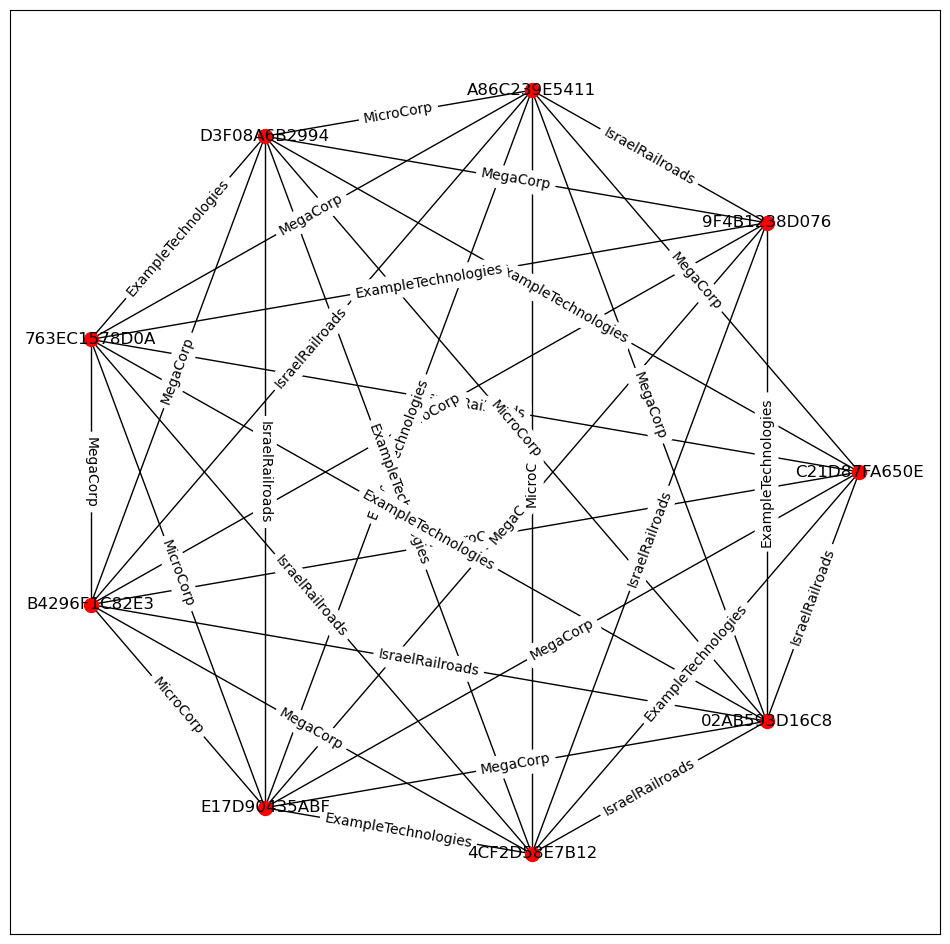

In [69]:
# Let's assemble an example graph.
ug_property_extraction_example = nx.Graph()
ug_property_extraction_example.add_node('C21D87FA650E', cpuType='Intel64', avgLoad=62, equipmentType='endpoint', location='EU')
ug_property_extraction_example.add_node('9F4B1238D076', cpuType='AMD64', avgLoad=81, equipmentType='router', location='AS')
ug_property_extraction_example.add_node('A86C239E5411', cpuType='ARM64', avgLoad=47, equipmentType='endpoint', location='US')
ug_property_extraction_example.add_node('D3F08A6B2994', cpuType='Intel64', avgLoad=29, equipmentType='router', location='ME')
ug_property_extraction_example.add_node('763EC1578D0A', cpuType='ARM32', avgLoad=93, equipmentType='endpoint', location='EU')
ug_property_extraction_example.add_node('B4296F1C82E3', cpuType='AMD64', avgLoad=54, equipmentType='router', location='US')
ug_property_extraction_example.add_node('E17D90435ABF', cpuType='Intel64', avgLoad=38, equipmentType='endpoint', location='AS')
ug_property_extraction_example.add_node('4CF2D58E7B12', cpuType='ARM64', avgLoad=76, equipmentType='router', location='EU')
ug_property_extraction_example.add_node('02AB593D16C8', cpuType='AMD64', avgLoad=65, equipmentType='endpoint', location='ME')

ug_property_extraction_example.add_edge('C21D87FA650E', 'A86C239E5411', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('C21D87FA650E', 'D3F08A6B2994', routeProvider='ExampleTechnologies')
ug_property_extraction_example.add_edge('C21D87FA650E', '763EC1578D0A', routeProvider='IsraelRailroads')
ug_property_extraction_example.add_edge('C21D87FA650E', 'B4296F1C82E3', routeProvider='MicroCorp')
ug_property_extraction_example.add_edge('C21D87FA650E', 'E17D90435ABF', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('C21D87FA650E', '4CF2D58E7B12', routeProvider='ExampleTechnologies')
ug_property_extraction_example.add_edge('C21D87FA650E', '02AB593D16C8', routeProvider='IsraelRailroads')

ug_property_extraction_example.add_edge('9F4B1238D076', 'A86C239E5411', routeProvider='IsraelRailroads')
ug_property_extraction_example.add_edge('9F4B1238D076', 'D3F08A6B2994', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('9F4B1238D076', '763EC1578D0A', routeProvider='ExampleTechnologies')
ug_property_extraction_example.add_edge('9F4B1238D076', 'B4296F1C82E3', routeProvider='MicroCorp')
ug_property_extraction_example.add_edge('9F4B1238D076', 'E17D90435ABF', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('9F4B1238D076', '4CF2D58E7B12', routeProvider='IsraelRailroads')
ug_property_extraction_example.add_edge('9F4B1238D076', '02AB593D16C8', routeProvider='ExampleTechnologies')

ug_property_extraction_example.add_edge('A86C239E5411', 'D3F08A6B2994', routeProvider='MicroCorp')
ug_property_extraction_example.add_edge('A86C239E5411', '763EC1578D0A', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('A86C239E5411', 'B4296F1C82E3', routeProvider='IsraelRailroads')
ug_property_extraction_example.add_edge('A86C239E5411', 'E17D90435ABF', routeProvider='ExampleTechnologies')
ug_property_extraction_example.add_edge('A86C239E5411', '4CF2D58E7B12', routeProvider='MicroCorp')
ug_property_extraction_example.add_edge('A86C239E5411', '02AB593D16C8', routeProvider='MegaCorp')

ug_property_extraction_example.add_edge('D3F08A6B2994', '763EC1578D0A', routeProvider='ExampleTechnologies')
ug_property_extraction_example.add_edge('D3F08A6B2994', 'B4296F1C82E3', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('D3F08A6B2994', 'E17D90435ABF', routeProvider='IsraelRailroads')
ug_property_extraction_example.add_edge('D3F08A6B2994', '4CF2D58E7B12', routeProvider='ExampleTechnologies')
ug_property_extraction_example.add_edge('D3F08A6B2994', '02AB593D16C8', routeProvider='MicroCorp')

ug_property_extraction_example.add_edge('763EC1578D0A', 'B4296F1C82E3', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('763EC1578D0A', 'E17D90435ABF', routeProvider='MicroCorp')
ug_property_extraction_example.add_edge('763EC1578D0A', '4CF2D58E7B12', routeProvider='IsraelRailroads')
ug_property_extraction_example.add_edge('763EC1578D0A', '02AB593D16C8', routeProvider='ExampleTechnologies')

ug_property_extraction_example.add_edge('B4296F1C82E3', 'E17D90435ABF', routeProvider='MicroCorp')
ug_property_extraction_example.add_edge('B4296F1C82E3', '4CF2D58E7B12', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('B4296F1C82E3', '02AB593D16C8', routeProvider='IsraelRailroads')

ug_property_extraction_example.add_edge('E17D90435ABF', '4CF2D58E7B12', routeProvider='ExampleTechnologies')
ug_property_extraction_example.add_edge('E17D90435ABF', '02AB593D16C8', routeProvider='MegaCorp')
ug_property_extraction_example.add_edge('4CF2D58E7B12', '02AB593D16C8', routeProvider='IsraelRailroads')


# Circular layout.

mpl.pyplot.figure(1, figsize=(12,12))

pos = nx.circular_layout(ug_property_extraction_example)
nx.draw_networkx(ug_property_extraction_example, pos, node_size=100, node_color='#ff0000', alpha=1)

labels = nx.get_edge_attributes(ug_property_extraction_example, "routeProvider")
nx.draw_networkx_edge_labels(ug_property_extraction_example, pos, edge_labels=labels)
mpl.pyplot.show()

In [70]:
# Pickle and unpickle example?

In [71]:
# Let us extract data into a Pandas DataFrame, specifically let's index it via node identifiers and add their attributes.
data = pd.DataFrame(index=ug_property_extraction_example.nodes())
data['cpuType'] = pd.Series(nx.get_node_attributes(ug_property_extraction_example, 'cpuType'))
data['avgLoad'] = pd.Series(nx.get_node_attributes(ug_property_extraction_example, 'avgLoad'))
data['equipmentType'] = pd.Series(nx.get_node_attributes(ug_property_extraction_example, 'equipmentType'))
data['location'] = pd.Series(nx.get_node_attributes(ug_property_extraction_example, 'location'))
# You can use NetworkX special functions to add additional useful data for nodes, such as clustering, degree, etc.
data['clustering'] = pd.Series(nx.clustering(ug_property_extraction_example))
data['degree'] = pd.Series(dict(ug_property_extraction_example.degree()))
data.head()

,cpuType,avgLoad,equipmentType,location,clustering,degree
C21D87FA650E,Intel64,62,endpoint,EU,1.000000,7
9F4B1238D076,AMD64,81,router,AS,1.000000,7
A86C239E5411,ARM64,47,endpoint,US,0.964286,8
D3F08A6B2994,Intel64,29,router,ME,0.964286,8
763EC1578D0A,ARM32,93,endpoint,EU,0.964286,8


We can do the same for edges.

In [72]:
# Let us extract edge data into a Pandas DataFrame, specifically let's index it via edge identifiers and add their attribute.
data = pd.DataFrame(index=ug_property_extraction_example.edges())
data['routeProvider'] = pd.Series(nx.get_edge_attributes(ug_property_extraction_example, 'routeProvider'))
data['preferential attachment']= [i[2] for i in nx.preferential_attachment(ug_property_extraction_example, data.index)]
data.head()

routeProvider  preferential attachment
C21D87FA650E A86C239E5411             MegaCorp                       56
             D3F08A6B2994  ExampleTechnologies                       56
             763EC1578D0A      IsraelRailroads                       56
             B4296F1C82E3            MicroCorp                       56
             E17D90435ABF             MegaCorp                       56

That's about it.

## Conclusion

This notebook shows some of the basic features of NetworkX with usage examples, and might be useful as a reference resource for those unfamiliar with the library.

The notebook was prepared as a source of examples for my presentation for Open University on the topic "Network data processing and manipulation using Python", for the course "Data Science Workshop", at 2025(Gimel) semester.